# Breast Cancer Diagnosis Prediction

This project aims to predict breast cancer diagnosis (Benign or Malignant) based on a set of features computed from **Fine Needle Aspiration (FNA)** samples of breast tissue. The dataset includes measurements such as the mean, standard error, and worst (largest) values of these features for each cell nucleus.

## Sample Image of FNA

Below is an image of an FNA sample showing cell nuclei in a breast tissue sample:

<img src="FNA_Sample.png" alt="FNA Sample Image" width="500" height="300">

The following key features are analyzed to make predictions:

- **Radius**: The size of the cell nucleus.
- **Texture**: The variability in pixel intensity within the cell nucleus image.
- **Perimeter**: The boundary length of the cell nucleus.
- **Area**: The area occupied by the nucleus, which can be computed from the radius.
- **Smoothness**: The variation in radius lengths, indicating how smooth the cell nucleus edges are.
- **Compactness**: A measure of how compact the nucleus is, calculated as \( \frac{\text{Perimeter}^2}{\text{Area}} - 1 \).
- **Concavity**: The extent to which the cell nucleus boundary curves inward.
- **Concave Points**: The number of concave portions of the cell boundary.
- **Symmetry**: How symmetrical the cell nucleus is.
- **Fractal Dimension**: A measure of the complexity of the boundary.

### Features Categories:

- **Mean**: Represents the average value of each feature across all cells.
- **Standard Error (SE)**: Reflects the variability in the measurements, providing insight into how consistent the feature values are.
- **Worst**: Represents the largest (worst) value of each feature, which often captures extreme cases and can be an indicator of malignancy.

Including the **Worst** values alongside the **Mean** and **SE** allows the model to detect not only the typical characteristics of the cell nuclei but also the extremes, which are important for diagnosing malignant tumors.

This project will use machine learning to predict the diagnosis based on these features.


## Importing Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import pickle

## Importing and Analyzing the Dataset

In [3]:
# Importing the dataset
data = pd.read_csv("C:/Users/aksha/Desktop/ML_Pr/Project/Scaled_updated_breast_cancer_data.csv")
data.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M     0.521037      0.022658        0.545989   0.363733   
1  927541         B     0.534214      0.783006        0.263768   0.076686   
2  898678         B     0.240381      0.310788        0.227144   0.128017   
3  927257         B     0.520379      0.146991        0.576507   0.842057   
4   92879         M     0.948087      0.724645        0.064945   0.004897   
5  927527         B     0.540128      0.135893        0.937315   0.340546   
6  926954         M     0.455251      0.621238        0.445788   0.303118   
7  871122         B     0.240381      0.102469        0.228388   0.129417   
8   91789         B     0.202518      0.342239        0.190104   0.103754   
9  927355         B     0.634641      0.330949        0.514451   0.894306   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.748918          0.329337        0.457736             0.780185   
2         0.281936          0.118275        0.017596             0.042187   
3         0.606440          0.188258        0.278396             0.448796   
4         0.372270          0.839493        0.250962             0.821056   
5         0.708974          0.327268        0.897618             0.181070   
6         0.288165          0.254340        0.216753             0.263519   
7         0.365442          0.101313        0.046204             0.097565   
8         0.293220          0.075916        0.011872             0.028151   
9         0.989517          0.387394        0.125072             0.435915   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...       0.141525         0.668310    0.450698          0.601136   
1  ...       0.098769         0.680097    0.883835          0.418068   
2  ...       0.400853         0.179939    0.092755          0.381232   
3  ...       0.680719         0.873752    0.462078          0.610213   
4  ...       0.848878         0.602210    0.570108          0.552838   
5  ...       0.239668         0.331285    0.196406          0.678812   
6  ...       0.589019         0.379949    0.230731          0.282177   
7  ...       0.170309         0.167688    0.085431          0.371987   
8  ...       0.384062         0.129339    0.061615          0.261705   
9  ...       0.380030         0.636851    0.681213          0.154694   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           0.619292         0.568610              0.912027        0.598462   
1           0.721164         0.278951              0.892079        0.646418   
2           0.104695         0.035990              0.175017        0.259215   
3           0.582326         0.717248              0.796260        0.070931   
4           0.097388         0.625082              0.889191        0.377007   
5           0.750146         0.803472              0.295998        0.540291   
6           0.273705         0.271805              0.487285        0.128721   
7           0.093052         0.068978              0.241409        0.187069   
8           0.048452         0.020232              0.097320        0.195545   
9           0.104367         0.838364              0.082289        0.457127   

   fractal_dimension_worst  Unnamed: 32  
0                 0.418864          NaN  
1                 0.829131     0.573531  
2                 0.169159          NaN  
3                 0.710393     0.909415  
4                 0.437618     0.125543  
5                 0.996469     0.158650  
6                 0.151909          NaN  
7                 0.157025          NaN  
8                 0.138331          NaN  
9                 0.315893     0.326367  

[10 rows x 33 columns]

In [4]:
data.info()
print("Shape of the data is:", np.shape(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1309 non-null   int64  
 1   diagnosis                1309 non-null   object 
 2   radius_mean              1309 non-null   float64
 3   texture_mean             1309 non-null   float64
 4   perimeter_mean           1309 non-null   float64
 5   area_mean                1309 non-null   float64
 6   smoothness_mean          1309 non-null   float64
 7   compactness_mean         1309 non-null   float64
 8   concavity_mean           1309 non-null   float64
 9   concave points_mean      1309 non-null   float64
 10  symmetry_mean            1309 non-null   float64
 11  fractal_dimension_mean   1309 non-null   float64
 12  radius_se                1309 non-null   float64
 13  texture_se               1309 non-null   float64
 14  perimeter_se            

## Dataset Information

The dataset used in this project consists of **1309 entries** and **33 columns**. Each row represents a sample of breast tissue, and the columns contain various features related to the cell nuclei, such as their size, shape, and texture. The goal is to use these features to predict the diagnosis of the breast tumor (either Benign or Malignant).

### Data Summary:

- **Total Entries**: 1309
- **Total Columns**: 33
- **Data Types**: 
  - 31 columns are of type `float64` (continuous numerical data).
  - 1 column (`id`) is of type `int64` (integer).
  - 1 column (`diagnosis`) is of type `object` (categorical data representing the diagnosis).

### Feature Overview:

| #   | Column                   | Non-Null Count | Data Type |
| --- | ------------------------ | -------------- | --------- |
| 0   | id                       | 1309 non-null  | int64     |
| 1   | diagnosis                | 1309 non-null  | object    |
| 2   | radius_mean              | 1309 non-null  | float64   |
| 3   | texture_mean             | 1309 non-null  | float64   |
| 4   | perimeter_mean           | 1309 non-null  | float64   |
| 5   | area_mean                | 1309 non-null  | float64   |
| 6   | smoothness_mean          | 1309 non-null  | float64   |
| 7   | compactness_mean         | 1309 non-null  | float64   |
| 8   | concavity_mean           | 1309 non-null  | float64   |
| 9   | concave points_mean      | 1309 non-null  | float64   |
| 10  | symmetry_mean            | 1309 non-null  | float64   |
| 11  | fractal_dimension_mean   | 1309 non-null  | float64   |
| 12  | radius_se                | 1309 non-null  | float64   |
| 13  | texture_se               | 1309 non-null  | float64   |
| 14  | perimeter_se             | 1309 non-null  | float64   |
| 15  | area_se                  | 1309 non-null  | float64   |
| 16  | smoothness_se            | 1309 non-null  | float64   |
| 17  | compactness_se           | 1309 non-null  | float64   |
| 18  | concavity_se             | 1309 non-null  | float64   |
| 19  | concave points_se        | 1309 non-null  | float64   |
| 20  | symmetry_se              | 1309 non-null  | float64   |
| 21  | fractal_dimension_se     | 1309 non-null  | float64   |
| 22  | radius_worst             | 1309 non-null  | float64   |
| 23  | texture_worst            | 1309 non-null  | float64   |
| 24  | perimeter_worst          | 1309 non-null  | float64   |
| 25  | area_worst               | 1309 non-null  | float64   |
| 26  | smoothness_worst         | 1309 non-null  | float64   |
| 27  | compactness_worst        | 1309 non-null  | float64   |
| 28  | concavity_worst          | 1309 non-null  | float64   |
| 29  | concave points_worst     | 1309 non-null  | float64   |
| 30  | symmetry_worst           | 1309 non-null  | float64   |
| 31  | fractal_dimension_worst  | 1309 non-null  | float64   |
| 32  | Unnamed: 32              | 740 non-null   | float64   |

### Data Shape:
- **Rows**: 1309
- **Columns**: 33

### Memory Usage:
The dataset uses approximately **337.6 KB** of memory.

> **Note**: Column `Unnamed: 32` contains missing values with only 740 non-null entries, which requires preprocessing before model training.


In [5]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  1.309000e+03  1309.000000   1309.000000     1309.000000  1309.000000   
mean   1.349052e+07     0.428360      0.423903        0.431072     0.371648   
std    8.370660e+07     0.254948      0.257580        0.252477     0.274316   
min    8.670000e+03     0.000000      0.000000        0.000000     0.000000   
25%    9.301000e+04     0.230144      0.229331        0.233588     0.141633   
50%    9.060240e+05     0.373348      0.367283        0.369358     0.283987   
75%    9.274430e+05     0.607175      0.593980        0.617194     0.566566   
max    9.113205e+08     1.000000      1.000000        1.000000     1.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count      1309.000000       1309.000000     1309.000000          1309.000000   
mean          0.458885          0.392637        0.375166             0.384282   
std           0.243081          0.269262        0.286415             0.279387   
min           0.000000          0.000000        0.000000             0.000000   
25%           0.287804          0.173333        0.115839             0.137326   
50%           0.425505          0.321128        0.315631             0.327554   
75%           0.612558          0.595424        0.593095             0.603604   
max           1.000000          1.000000        1.000000             1.000000   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count    1309.000000  ...    1309.000000      1309.000000  1309.000000   
mean        0.451232  ...       0.442407         0.401563     0.346481   
std         0.241671  ...       0.255891         0.264283     0.278238   
min         0.000000  ...       0.000000         0.000000     0.000000   
25%         0.276263  ...       0.240453         0.183326     0.106835   
50%         0.410531  ...       0.401919         0.329588     0.264157   
75%         0.625097  ...       0.612514         0.596095     0.543844   
max         1.000000  ...       1.000000         1.000000     1.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count       1309.000000        1309.000000      1309.000000   
mean           0.458707           0.370288         0.378722   
std            0.239990           0.272592         0.278359   
min            0.000000           0.000000         0.000000   
25%            0.288120           0.145540         0.142652   
50%            0.435777           0.293594         0.316693   
75%            0.612362           0.567292         0.570917   
max            1.000000           1.000000         1.000000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count           1309.000000     1309.000000              1309.000000   
mean               0.459086        0.402503                 0.356557   
std                0.274071        0.254590                 0.269976   
min                0.000000        0.000000                 0.000000   
25%                0.230747        0.208358                 0.141677   
50%                0.433632        0.319141                 0.267278   
75%                0.685911        0.598462                 0.550973   
max                1.000000        1.000000                 1.000000   

       Unnamed: 32  
count   740.000000  
mean      0.492057  
std       0.288978  
min       0.000604  
25%       0.248923  
50%       0.485659  
75%       0.743667  
max       0.998972  

[8 rows x 32 columns]

In [6]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
# Counting the Null Values
data.isna().mean()

id                         0.000000
diagnosis                  0.000000
radius_mean                0.000000
texture_mean               0.000000
perimeter_mean             0.000000
area_mean                  0.000000
smoothness_mean            0.000000
compactness_mean           0.000000
concavity_mean             0.000000
concave points_mean        0.000000
symmetry_mean              0.000000
fractal_dimension_mean     0.000000
radius_se                  0.000000
texture_se                 0.000000
perimeter_se               0.000000
area_se                    0.000000
smoothness_se              0.000000
compactness_se             0.000000
concavity_se               0.000000
concave points_se          0.000000
symmetry_se                0.000000
fractal_dimension_se       0.000000
radius_worst               0.000000
texture_worst              0.000000
perimeter_worst            0.000000
area_worst                 0.000000
smoothness_worst           0.000000
compactness_worst          0

In [8]:
# Dropping irrelevant columns
data = data.drop(columns=['Unnamed: 32', 'id'], errors='ignore')
data.isna().mean()

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

In [9]:
# Handling Duplicated data
df = data
duplicates = df.duplicated().sum()
print("Number of Duplicates: ", duplicates)

Number of Duplicates:  0


In [10]:
# Handling missing values in dataset
for col in data.select_dtypes("number").columns:
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    data[col] = np.squeeze(imputed_values)

data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            M     0.521037      0.022658        0.545989   0.363733   
1            B     0.534214      0.783006        0.263768   0.076686   
2            B     0.240381      0.310788        0.227144   0.128017   
3            B     0.520379      0.146991        0.576507   0.842057   
4            M     0.948087      0.724645        0.064945   0.004897   
...        ...          ...           ...             ...        ...   
1304         B     0.096928      0.257694        0.103656   0.045387   
1305         M     0.327300      0.582812        0.094130   0.762704   
1306         B     0.284396      0.152858        0.278419   0.157285   
1307         M     0.023723      0.451211        0.667092   0.013938   
1308         B     0.876491      0.052045        0.326331   0.879937   

      smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.593753          0.792037        0.703140             0.731113   
1            0.748918          0.329337        0.457736             0.780185   
2            0.281936          0.118275        0.017596             0.042187   
3            0.606440          0.188258        0.278396             0.448796   
4            0.372270          0.839493        0.250962             0.821056   
...               ...               ...             ...                  ...   
1304         0.487226          0.373965        0.733365             0.217445   
1305         0.211131          0.894615        0.940734             0.747818   
1306         0.379074          0.246212        0.087582             0.104274   
1307         0.808761          0.692164        0.212138             0.004219   
1308         0.913446          0.494907        0.610803             0.505412   

      symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0          0.686364  ...      0.620776       0.141525         0.668310   
1          0.491689  ...      0.580363       0.098769         0.680097   
2          0.250000  ...      0.203131       0.400853         0.179939   
3          0.326153  ...      0.418551       0.680719         0.873752   
4          0.000038  ...      0.690134       0.848878         0.602210   
...             ...  ...           ...            ...              ...   
1304       0.530808  ...      0.084667       0.283316         0.075153   
1305       0.702090  ...      0.100896       0.307106         0.496119   
1306       0.298990  ...      0.205977       0.130330         0.184123   
1307       0.600734  ...      0.409071       0.361987         0.510318   
1308       0.695572  ...      0.657135       0.957956         0.221063   

      area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       0.450698          0.601136           0.619292         0.568610   
1       0.883835          0.418068           0.721164         0.278951   
2       0.092755          0.381232           0.104695         0.035990   
3       0.462078          0.610213           0.582326         0.717248   
4       0.570108          0.552838           0.097388         0.625082   
...          ...               ...                ...              ...   
1304    0.034285          0.508684           0.397018         1.000000   
1305    0.890970          0.345156           0.749852         0.564959   
1306    0.096048          0.284158           0.165139         0.115815   
1307    0.433005          0.314786           0.598414         0.995584   
1308    0.495699          0.279551           0.240586         0.281405   

      concave points_worst  symmetry_worst  fractal_dimension_worst  
0                 0.912027        0.598462                 0.418864  
1                 0.892079        0.646418                 0.829131  
2                 0.175017        0.259215                 0.169159  
3                 0.796260        0.070931                 0.710393  
4                 0.889191        0.377007         

In [11]:
# Finding the number of Outliers in the dataset
lower_threshold = 0.01  # Lower boundary for outliers
upper_threshold = 0.99  # Upper boundary for outliers

outliers_count = {}

# Iterate through each feature and check for outliers
for column in data.columns:
    if column != 'id' and column != 'diagnosis': 
        lower_outliers = data[column][data[column] < lower_threshold].count()
        upper_outliers = data[column][data[column] > upper_threshold].count()
        total_outliers = lower_outliers + upper_outliers
        outliers_count[column] = total_outliers

# Print the number of outliers for each feature
for feature, count in outliers_count.items():
    print(f"Feature '{feature}' has {count} outliers.")

Feature 'radius_mean' has 12 outliers.
Feature 'texture_mean' has 16 outliers.
Feature 'perimeter_mean' has 9 outliers.
Feature 'area_mean' has 18 outliers.
Feature 'smoothness_mean' has 16 outliers.
Feature 'compactness_mean' has 18 outliers.
Feature 'concavity_mean' has 44 outliers.
Feature 'concave points_mean' has 29 outliers.
Feature 'symmetry_mean' has 11 outliers.
Feature 'fractal_dimension_mean' has 22 outliers.
Feature 'radius_se' has 36 outliers.
Feature 'texture_se' has 26 outliers.
Feature 'perimeter_se' has 24 outliers.
Feature 'area_se' has 66 outliers.
Feature 'smoothness_se' has 15 outliers.
Feature 'compactness_se' has 17 outliers.
Feature 'concavity_se' has 47 outliers.
Feature 'concave points_se' has 22 outliers.
Feature 'symmetry_se' has 17 outliers.
Feature 'fractal_dimension_se' has 28 outliers.
Feature 'radius_worst' has 17 outliers.
Feature 'texture_worst' has 19 outliers.
Feature 'perimeter_worst' has 11 outliers.
Feature 'area_worst' has 18 outliers.
Feature '

In [12]:
# Style Template
sns.set(style="whitegrid")
colors=['#CDC2A5', '#606676']  

palette={'B': colors[0], 'M': colors[1]}

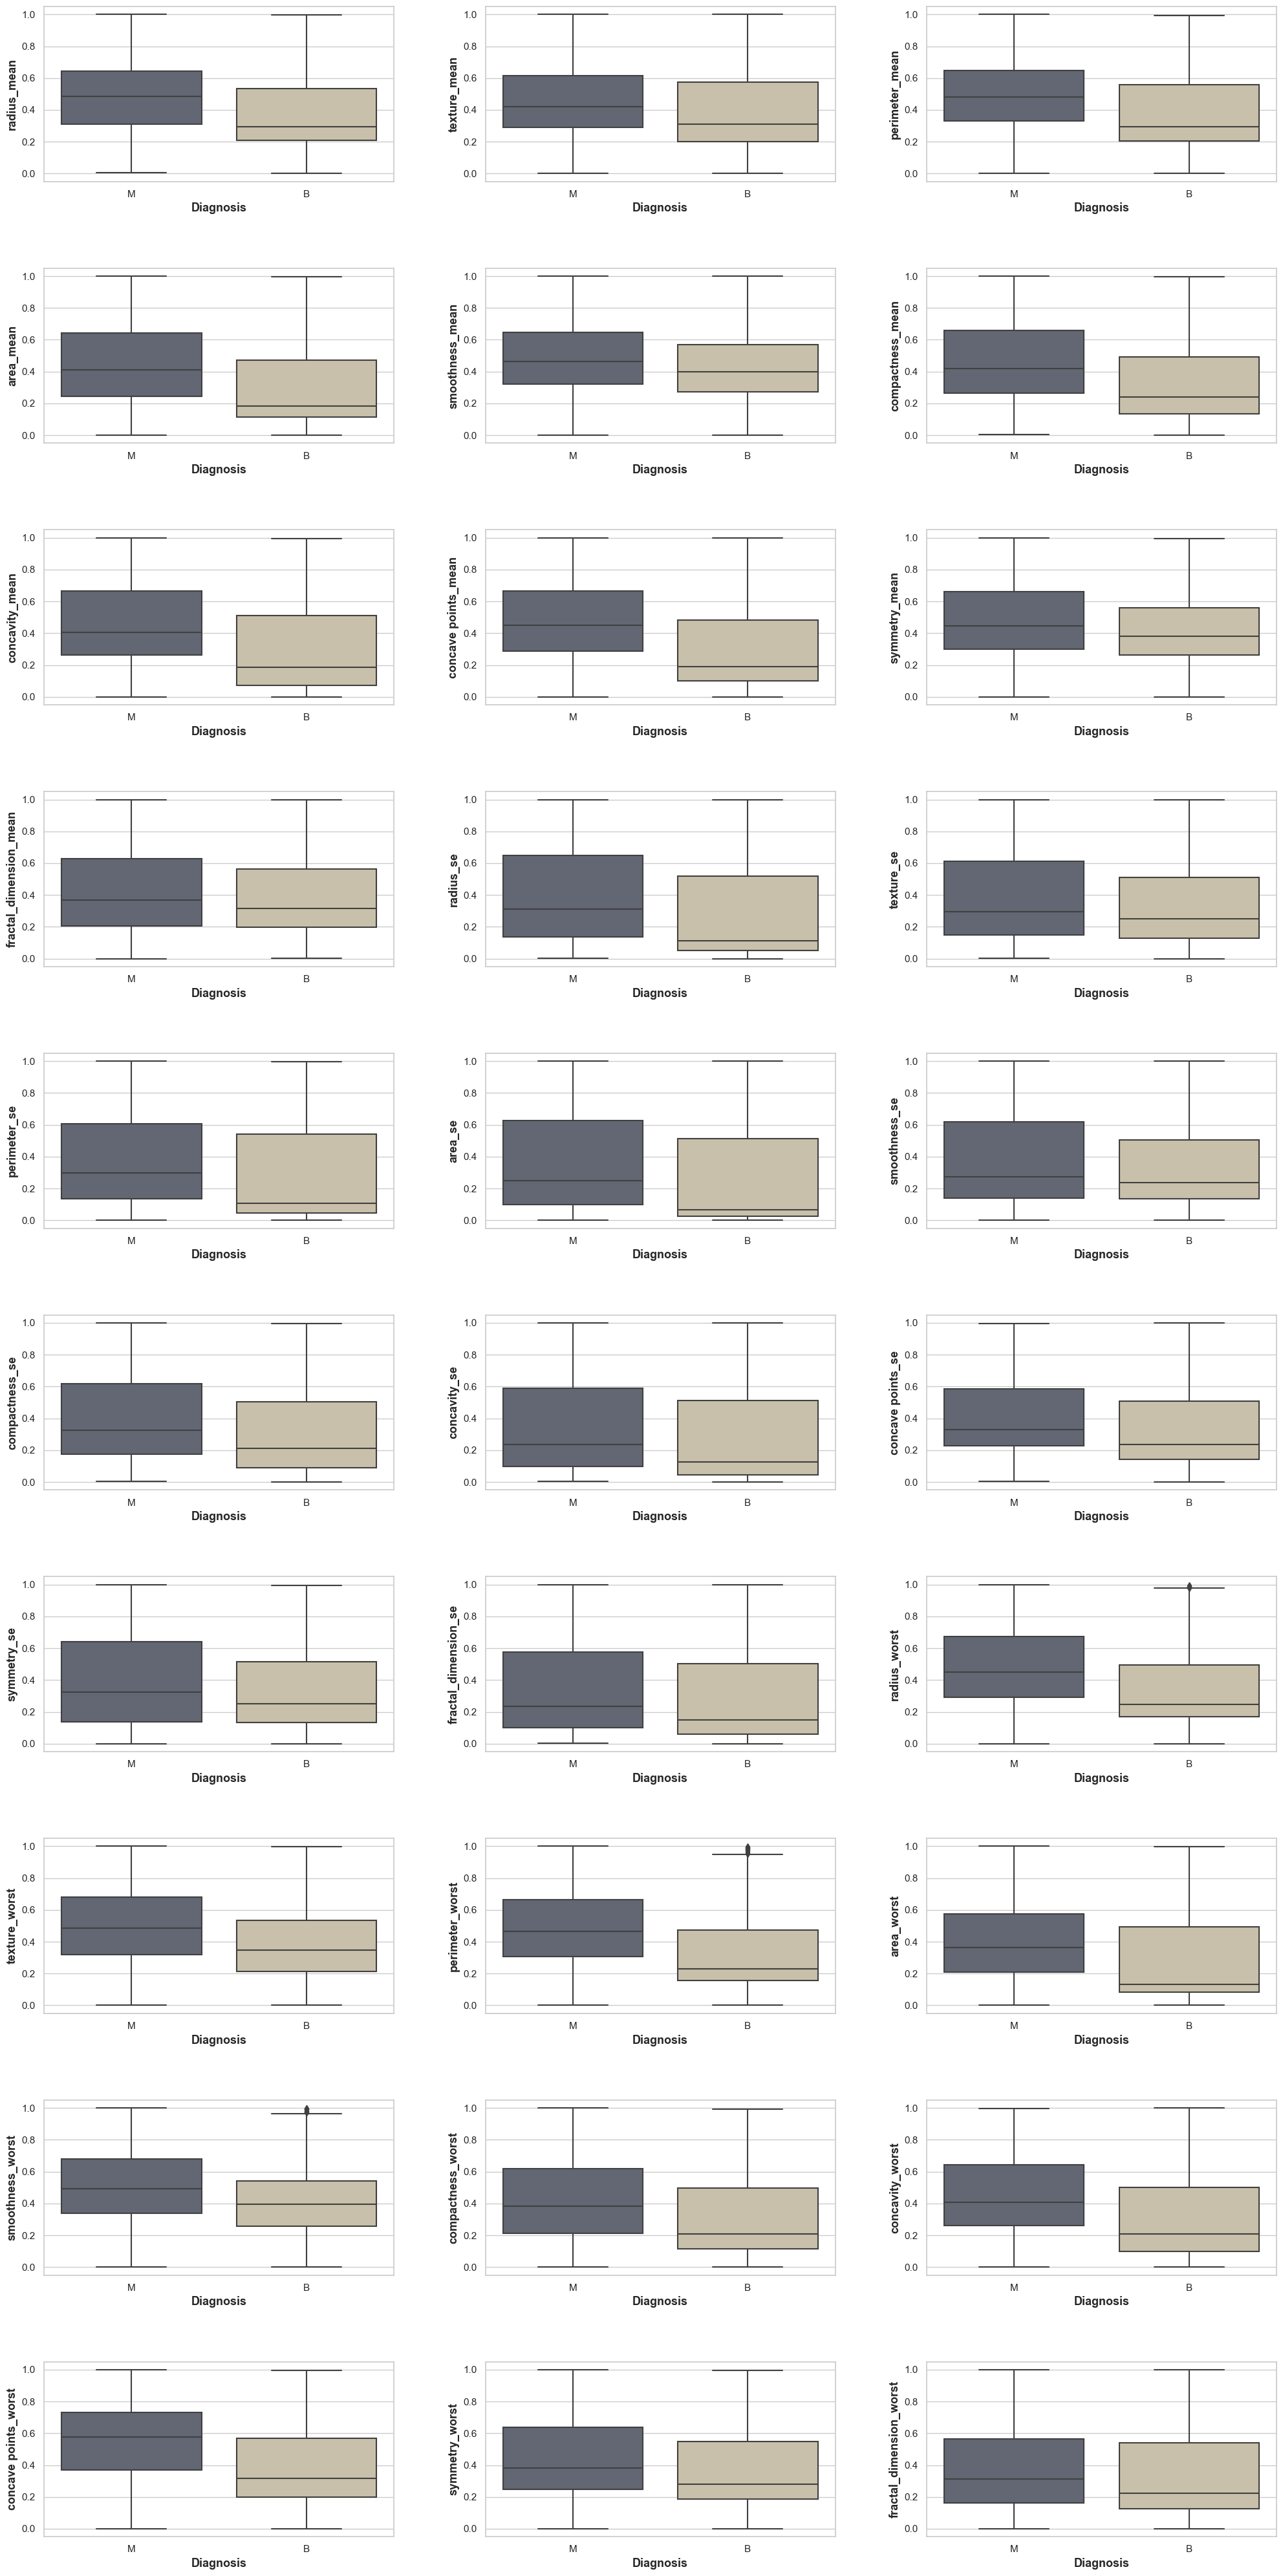

In [13]:
# Box Plot for outliers
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(data.columns[1:]):
    sns.boxplot(x='diagnosis', y=col, data=data, ax=ax[i], palette=palette)
    ax[i].set_xlabel('Diagnosis', fontsize = 13, fontweight = 'bold')
    ax[i].set_ylabel(col, fontsize = 13, fontweight = 'bold')
    
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

## Outliers in the Dataset

Outliers are data points that differ significantly from the majority of observations and can have a strong impact on model performance. Identifying and managing outliers is a critical part of data preprocessing.

Below is a summary of the number of outliers detected in each feature:

| Feature                      | Number of Outliers |
|------------------------------|--------------------|
| **radius_mean**               | 12                 |
| **texture_mean**              | 16                 |
| **perimeter_mean**            | 9                  |
| **area_mean**                 | 18                 |
| **smoothness_mean**           | 16                 |
| **compactness_mean**          | 18                 |
| **concavity_mean**            | 44                 |
| **concave points_mean**       | 29                 |
| **symmetry_mean**             | 11                 |
| **fractal_dimension_mean**    | 22                 |
| **radius_se**                 | 36                 |
| **texture_se**                | 26                 |
| **perimeter_se**              | 24                 |
| **area_se**                   | 66                 |
| **smoothness_se**             | 15                 |
| **compactness_se**            | 17                 |
| **concavity_se**              | 47                 |
| **concave points_se**         | 22                 |
| **symmetry_se**               | 17                 |
| **fractal_dimension_se**      | 28                 |
| **radius_worst**              | 17                 |
| **texture_worst**             | 19                 |
| **perimeter_worst**           | 11                 |
| **area_worst**                | 18                 |
| **smoothness_worst**          | 18                 |
| **compactness_worst**         | 15                 |
| **concavity_worst**           | 33                 |
| **concave points_worst**      | 34                 |
| **symmetry_worst**            | 14                 |
| **fractal_dimension_worst**   | 18                 |

Outliers in the dataset are treated by replacing them with the medians of the dataset values.

In [14]:
# Replace outliers with the median of each feature
lower_threshold = 0.01
upper_threshold = 0.99

# Copying the original data to avoid modifying it directly
data_imputed = data.copy()

# Apply imputation for each column except 'id' and 'diagnosis'
for column in data_imputed.columns:
    if column != 'id' and column != 'diagnosis':
        median_value = data_imputed[column].median()  # Calculate the median for imputation
        # Replace values below the lower threshold and above the upper threshold with the median
        data_imputed[column] = data_imputed[column].apply(lambda x: median_value if (x < lower_threshold or x > upper_threshold) else x)

# Now the outliers are replaced with the median
print(data_imputed.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M     0.521037      0.022658        0.545989   0.363733   
1         B     0.534214      0.783006        0.263768   0.076686   
2         B     0.240381      0.310788        0.227144   0.128017   
3         B     0.520379      0.146991        0.576507   0.842057   
4         M     0.948087      0.724645        0.064945   0.283987   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.748918          0.329337        0.457736             0.780185   
2         0.281936          0.118275        0.017596             0.042187   
3         0.606440          0.188258        0.278396             0.448796   
4         0.372270          0.839493        0.250962             0.821056   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       0.686364  ...      0.620776       0.141525 

In [15]:
# Replacing imputed data with original data
data = data_imputed

In [16]:
# Style Template
sns.set(style="whitegrid")
colors=['#CDC2A5', '#606676']  

palette={'B': colors[0], 'M': colors[1]}

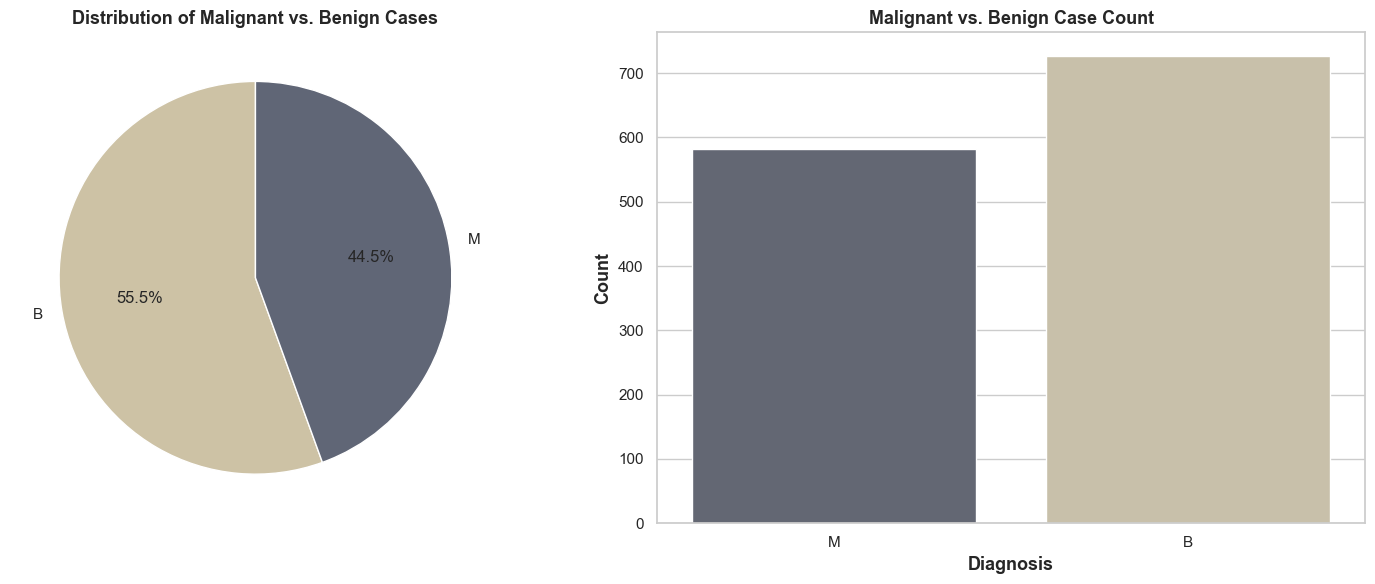

In [17]:
# Dataset Analysis
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  

axs[0].pie(data['diagnosis'].value_counts(), labels=data['diagnosis'].value_counts().index,
           autopct='%1.1f%%',startangle=90, colors=colors)
axs[0].set_title('Distribution of Malignant vs. Benign Cases', fontsize = 13, fontweight = 'bold')


sns.countplot(x='diagnosis', data=data, ax=axs[1], palette=palette)
axs[1].set_title('Malignant vs. Benign Case Count', fontsize = 13, fontweight = 'bold')
axs[1].set_xlabel('Diagnosis', fontsize = 13, fontweight = 'bold')
axs[1].set_ylabel('Count', fontsize = 13, fontweight = 'bold')  

plt.tight_layout()
plt.show()

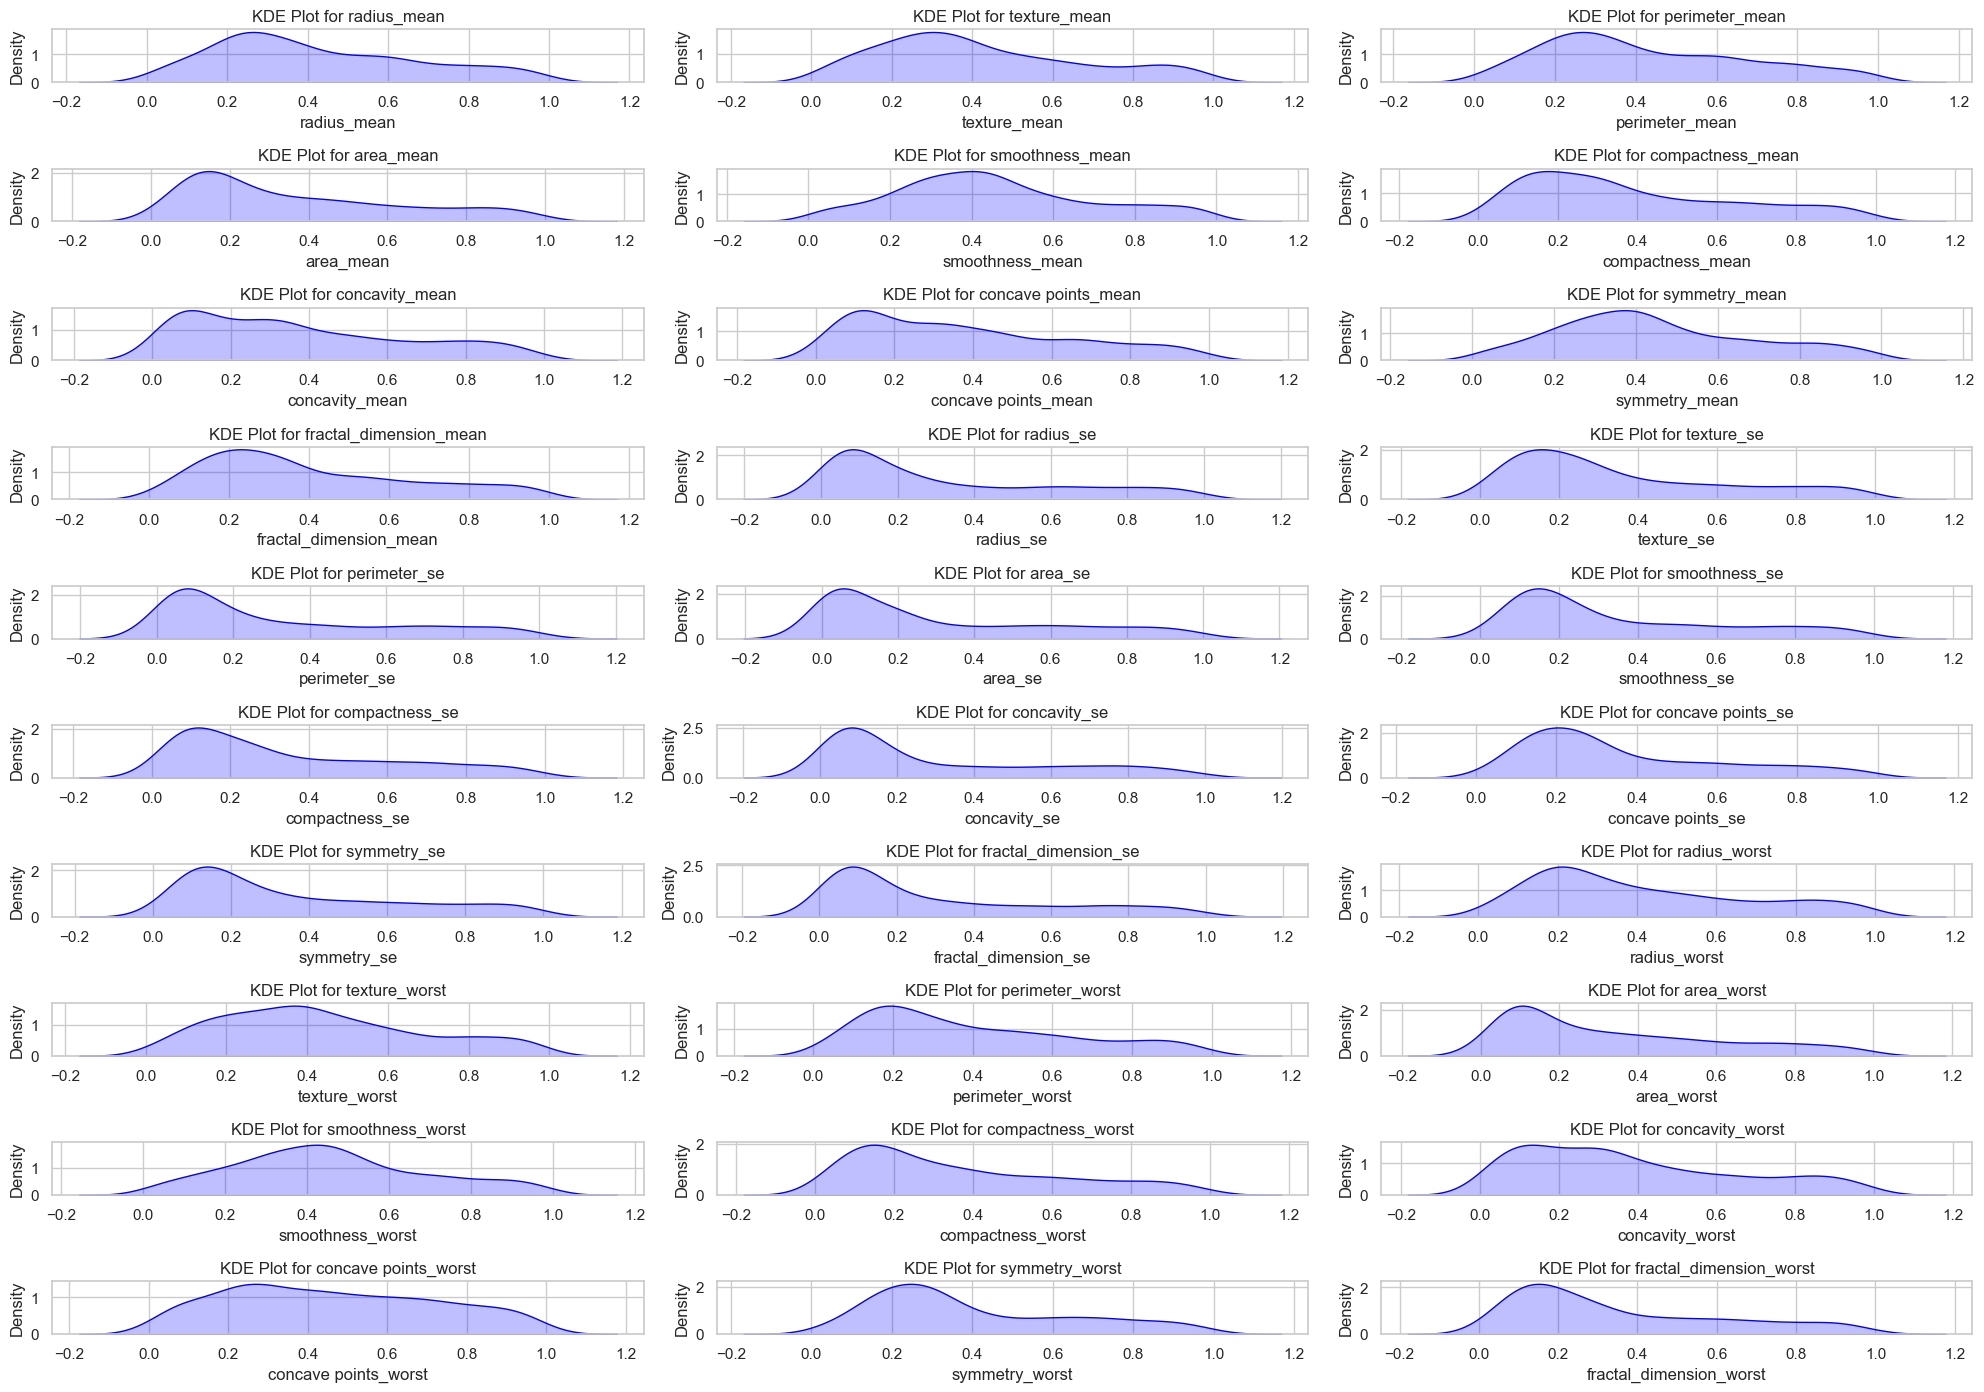

In [18]:
# Univariate Analysis

# Display of KDE plot for all the features
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set the style for the plots
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(20, 15))

# Loop through all the numerical columns and create KDE plots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.kdeplot(data[column], fill=True, color="blue")
    plt.title(f'KDE Plot for {column}')
    plt.tight_layout()

# Show the plots
plt.show()

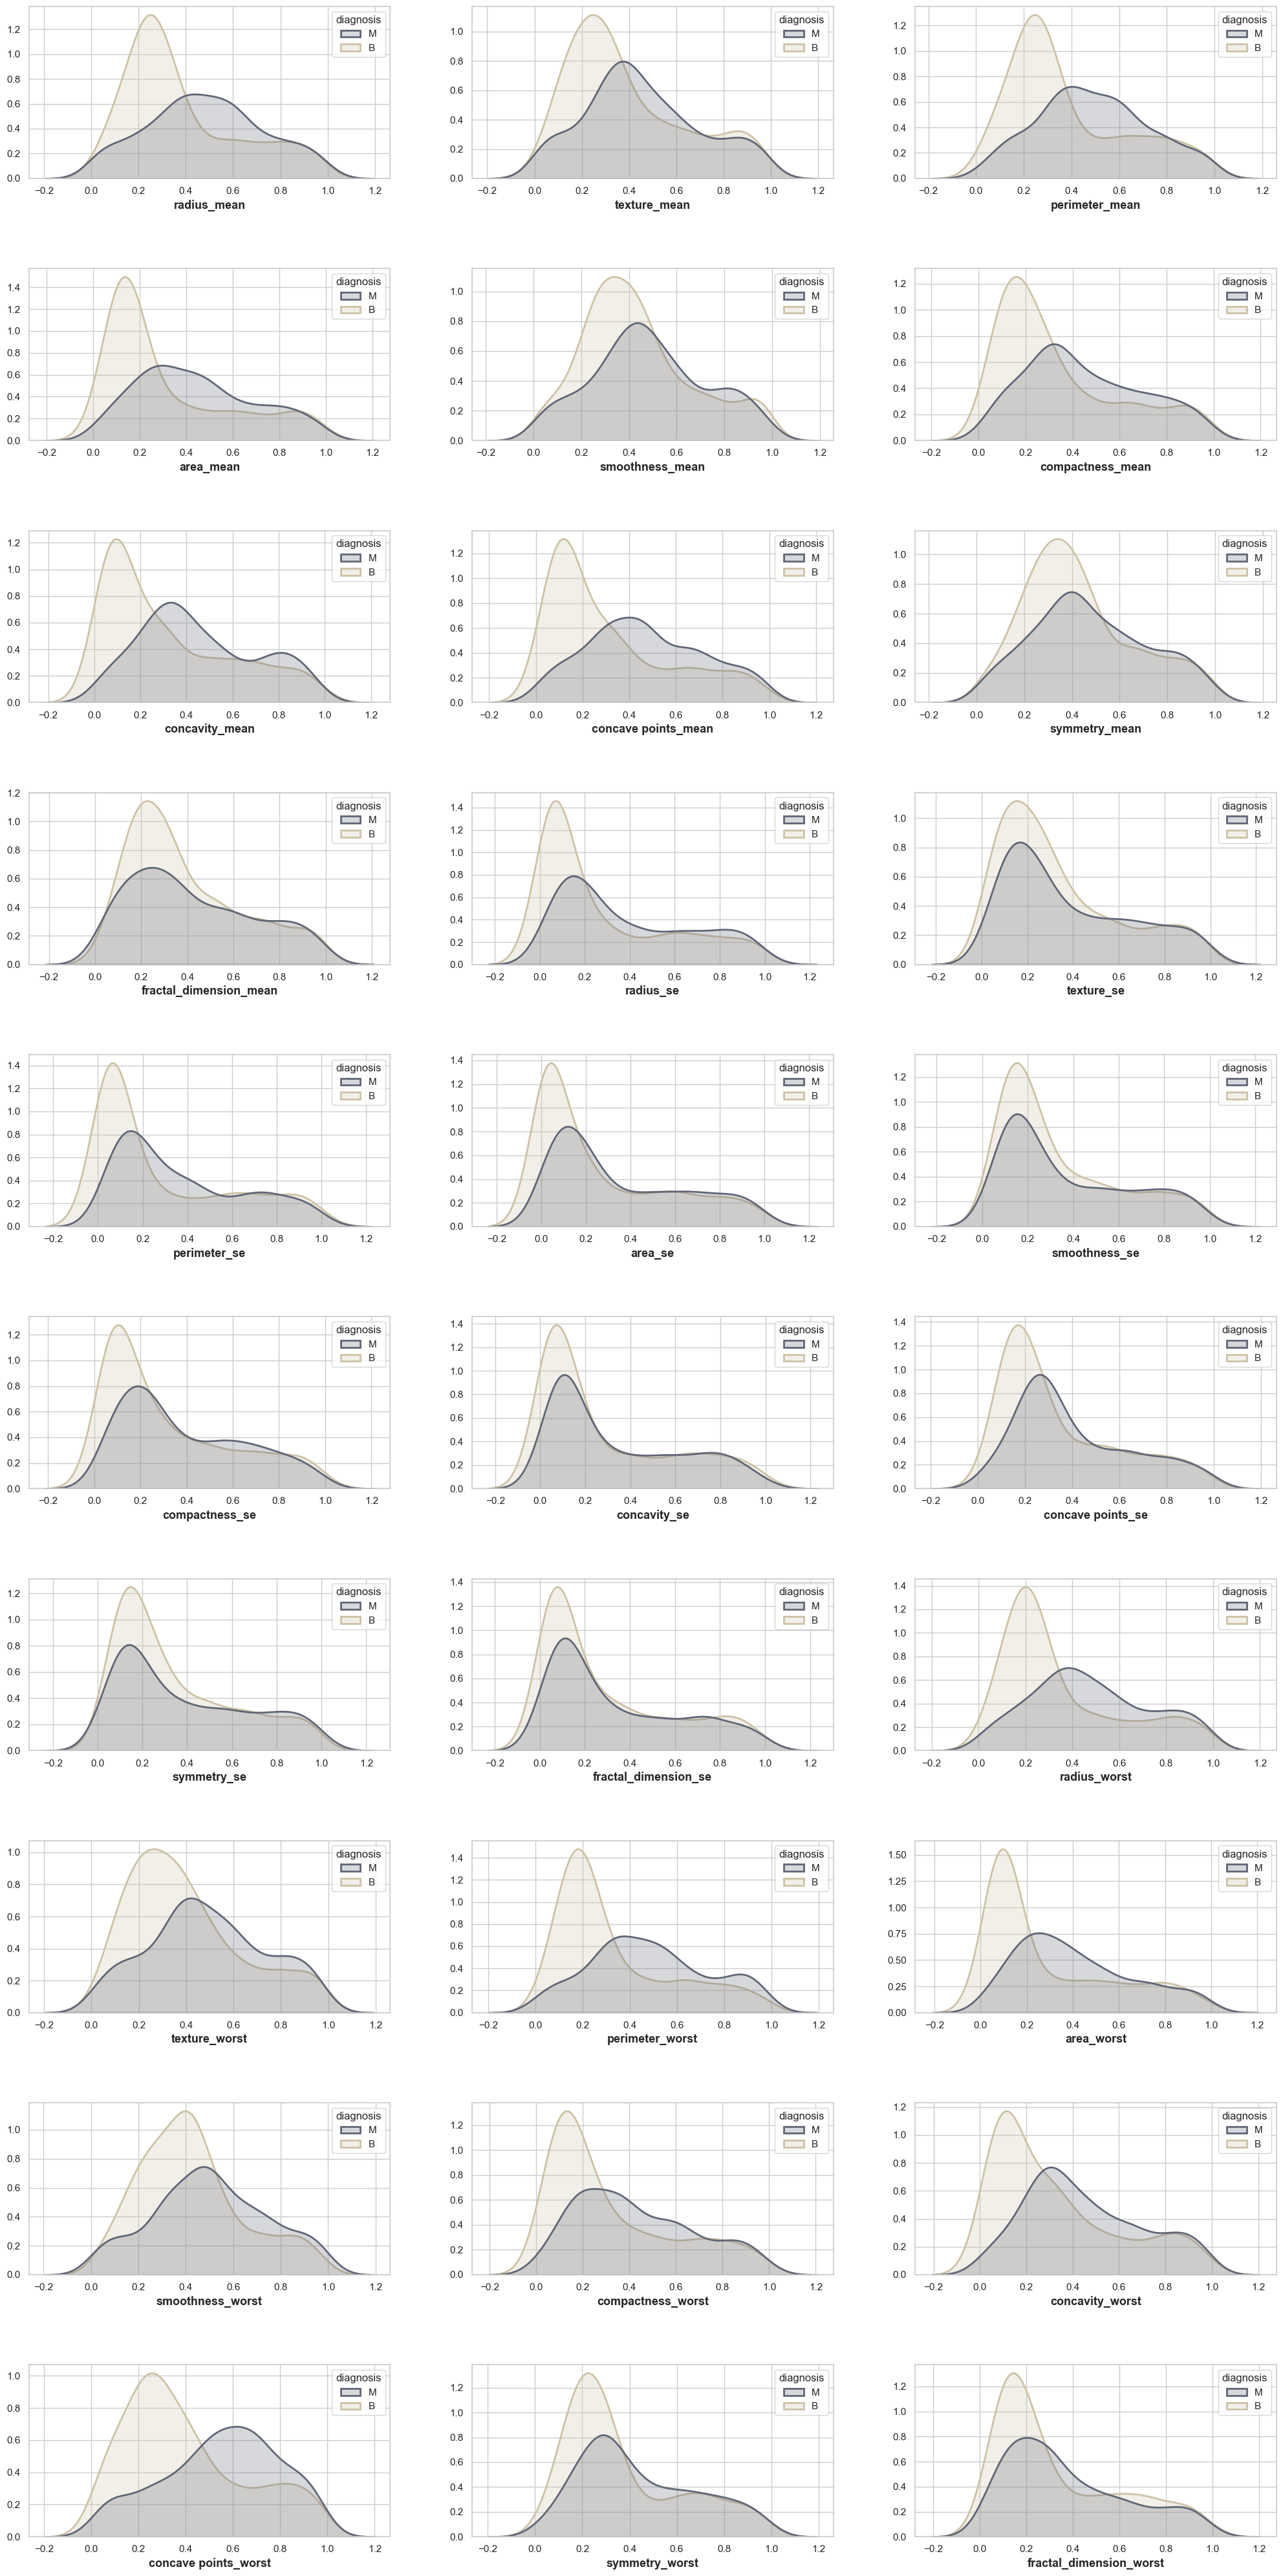

In [19]:
# Bivariate Analysis
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(data.columns[1:]):
    sns.kdeplot(x=col, data=data, ax=ax[i], fill=True, lw=2, hue = 'diagnosis', palette=palette)
    ax[i].set_xlabel(col, fontsize = 13, fontweight = 'bold')
    ax[i].set_ylabel('')
    
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

In [20]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting SE Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

In [21]:
list_se=s_col.copy()
list_se.remove('diagnosis')
df_se=data[list_se]

list_mean=m_col.copy()
list_mean.remove('diagnosis')
df_mean=data[list_mean]

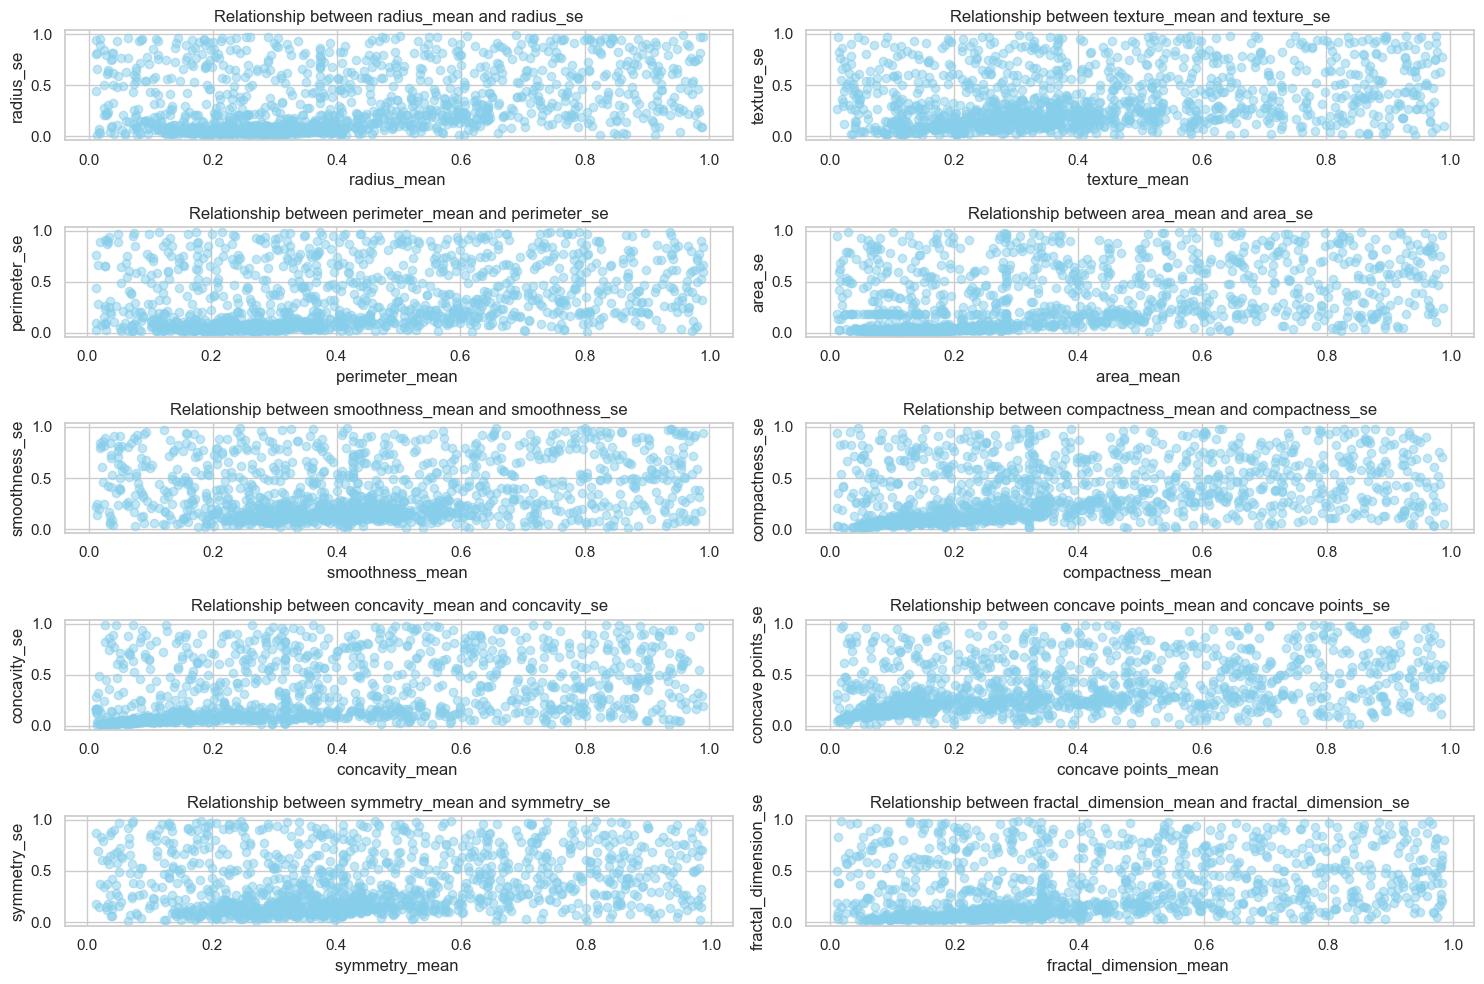

In [22]:
# Relation between Mean Features and their standard eror

num_features = len(df_se.columns)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else num_features // 2 + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axs array if it's more than 1D
if num_rows > 1:
    axs = axs.flatten()

# Iterate over each feature in df_se and df_mean
for i, (feature_se, feature_mean) in enumerate(zip(df_se.columns, df_mean.columns)):
    # Create a scatter plot on the current axis
    axs[i].scatter(df_mean[feature_mean], df_se[feature_se], color='skyblue',alpha=0.5)
    axs[i].set_xlabel(f'{feature_mean} ')
    axs[i].set_ylabel(f'{feature_se}')
    axs[i].set_title(f'Relationship between {feature_mean} and {feature_se}')
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [23]:
# The Relationships are approximately linear therefore dropping se columns
# Dropping the columns
se_col = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']
data = data.drop(columns=se_col)

## Dropping Standard Error (SE) Columns

Upon analyzing the dataset, we have identified a **strong linear relationship** between the **mean** and **standard error (SE)** columns for most features. Since the standard errors do not contribute additional independent information to the model, we have decided to drop these columns to reduce redundancy and simplify the model.

The following SE columns are being dropped from the dataset:

- `radius_se`
- `texture_se`
- `perimeter_se`
- `area_se`
- `smoothness_se`
- `compactness_se`
- `concavity_se`
- `concave points_se`
- `symmetry_se`
- `fractal_dimension_se`


In [24]:
# Convert the 'diagnosis' column to numeric: 1 for 'M' and 0 for 'B'
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Compute the correlation matrix
correlation_matrix = data.corr()

correlation_matrix

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.207371      0.128445        0.220011   
radius_mean               0.207371     1.000000      0.145795        0.314180   
texture_mean              0.128445     0.145795      1.000000        0.148084   
perimeter_mean            0.220011     0.314180      0.148084        1.000000   
area_mean                 0.242435     0.284376      0.169742        0.348205   
smoothness_mean           0.104872     0.095615      0.037399        0.089873   
compactness_mean          0.214726     0.205002      0.192490        0.240459   
concavity_mean            0.245950     0.289086      0.210223        0.296558   
concave points_mean       0.292052     0.309378      0.163614        0.292580   
symmetry_mean             0.102954     0.111635      0.088650        0.107469   
fractal_dimension_mean    0.065187     0.126949      0.117732        0.146111   
radius_worst              0.242746     0.358132      0.191801        0.305817   
texture_worst             0.182959     0.137202      0.234542        0.160501   
perimeter_worst           0.294886     0.298025      0.159245        0.309954   
area_worst                0.222845     0.356580      0.229740        0.323079   
smoothness_worst          0.169237     0.103455      0.091239        0.104998   
compactness_worst         0.200980     0.234577      0.214038        0.214685   
concavity_worst           0.229324     0.240392      0.263688        0.248640   
concave points_worst      0.284345     0.235851      0.121695        0.219023   
symmetry_worst            0.140357     0.166118      0.199192        0.170348   
fractal_dimension_worst   0.081493     0.164147      0.241423        0.192606   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.242435         0.104872          0.214726   
radius_mean               0.284376         0.095615          0.205002   
texture_mean              0.169742         0.037399          0.192490   
perimeter_mean            0.348205         0.089873          0.240459   
area_mean                 1.000000         0.183218          0.261669   
smoothness_mean           0.183218         1.000000          0.139954   
compactness_mean          0.261669         0.139954          1.000000   
concavity_mean            0.308461         0.189937          0.343067   
concave points_mean       0.321665         0.195831          0.314392   
symmetry_mean             0.165051         0.096357          0.141830   
fractal_dimension_mean    0.170152         0.252980          0.268852   
radius_worst              0.257491         0.113468          0.230016   
texture_worst             0.201832         0.072699          0.108935   
perimeter_worst           0.333179         0.150980          0.273544   
area_worst                0.396530         0.168373          0.323991   
smoothness_worst          0.135813         0.177267          0.162342   
compactness_worst         0.286675         0.194285          0.341669   
concavity_worst           0.363667         0.145502          0.341559   
concave points_worst      0.207971         0.121736          0.273696   
symmetry_worst            0.240722         0.144927          0.235762   
fractal_dimension_worst   0.269671         0.191420          0.311118   

                         concavity_mean  concave points_mean  symmetry_mean  \
diagnosis                      0.245950             0.292052       0.102954   
radius_mean                    0.289086             0.309378       0.111635   
texture_mean                   0.210223             0.163614       0.088650   
perimeter_mean                 0.296558             0.292580       0.107469   
area_mean                      0.308461             0.321665       0.165051   
smoothness_mean                0.189937             0.195831       0.096357   
compactness_mean               0.343067             0.314392       0.141830   
con

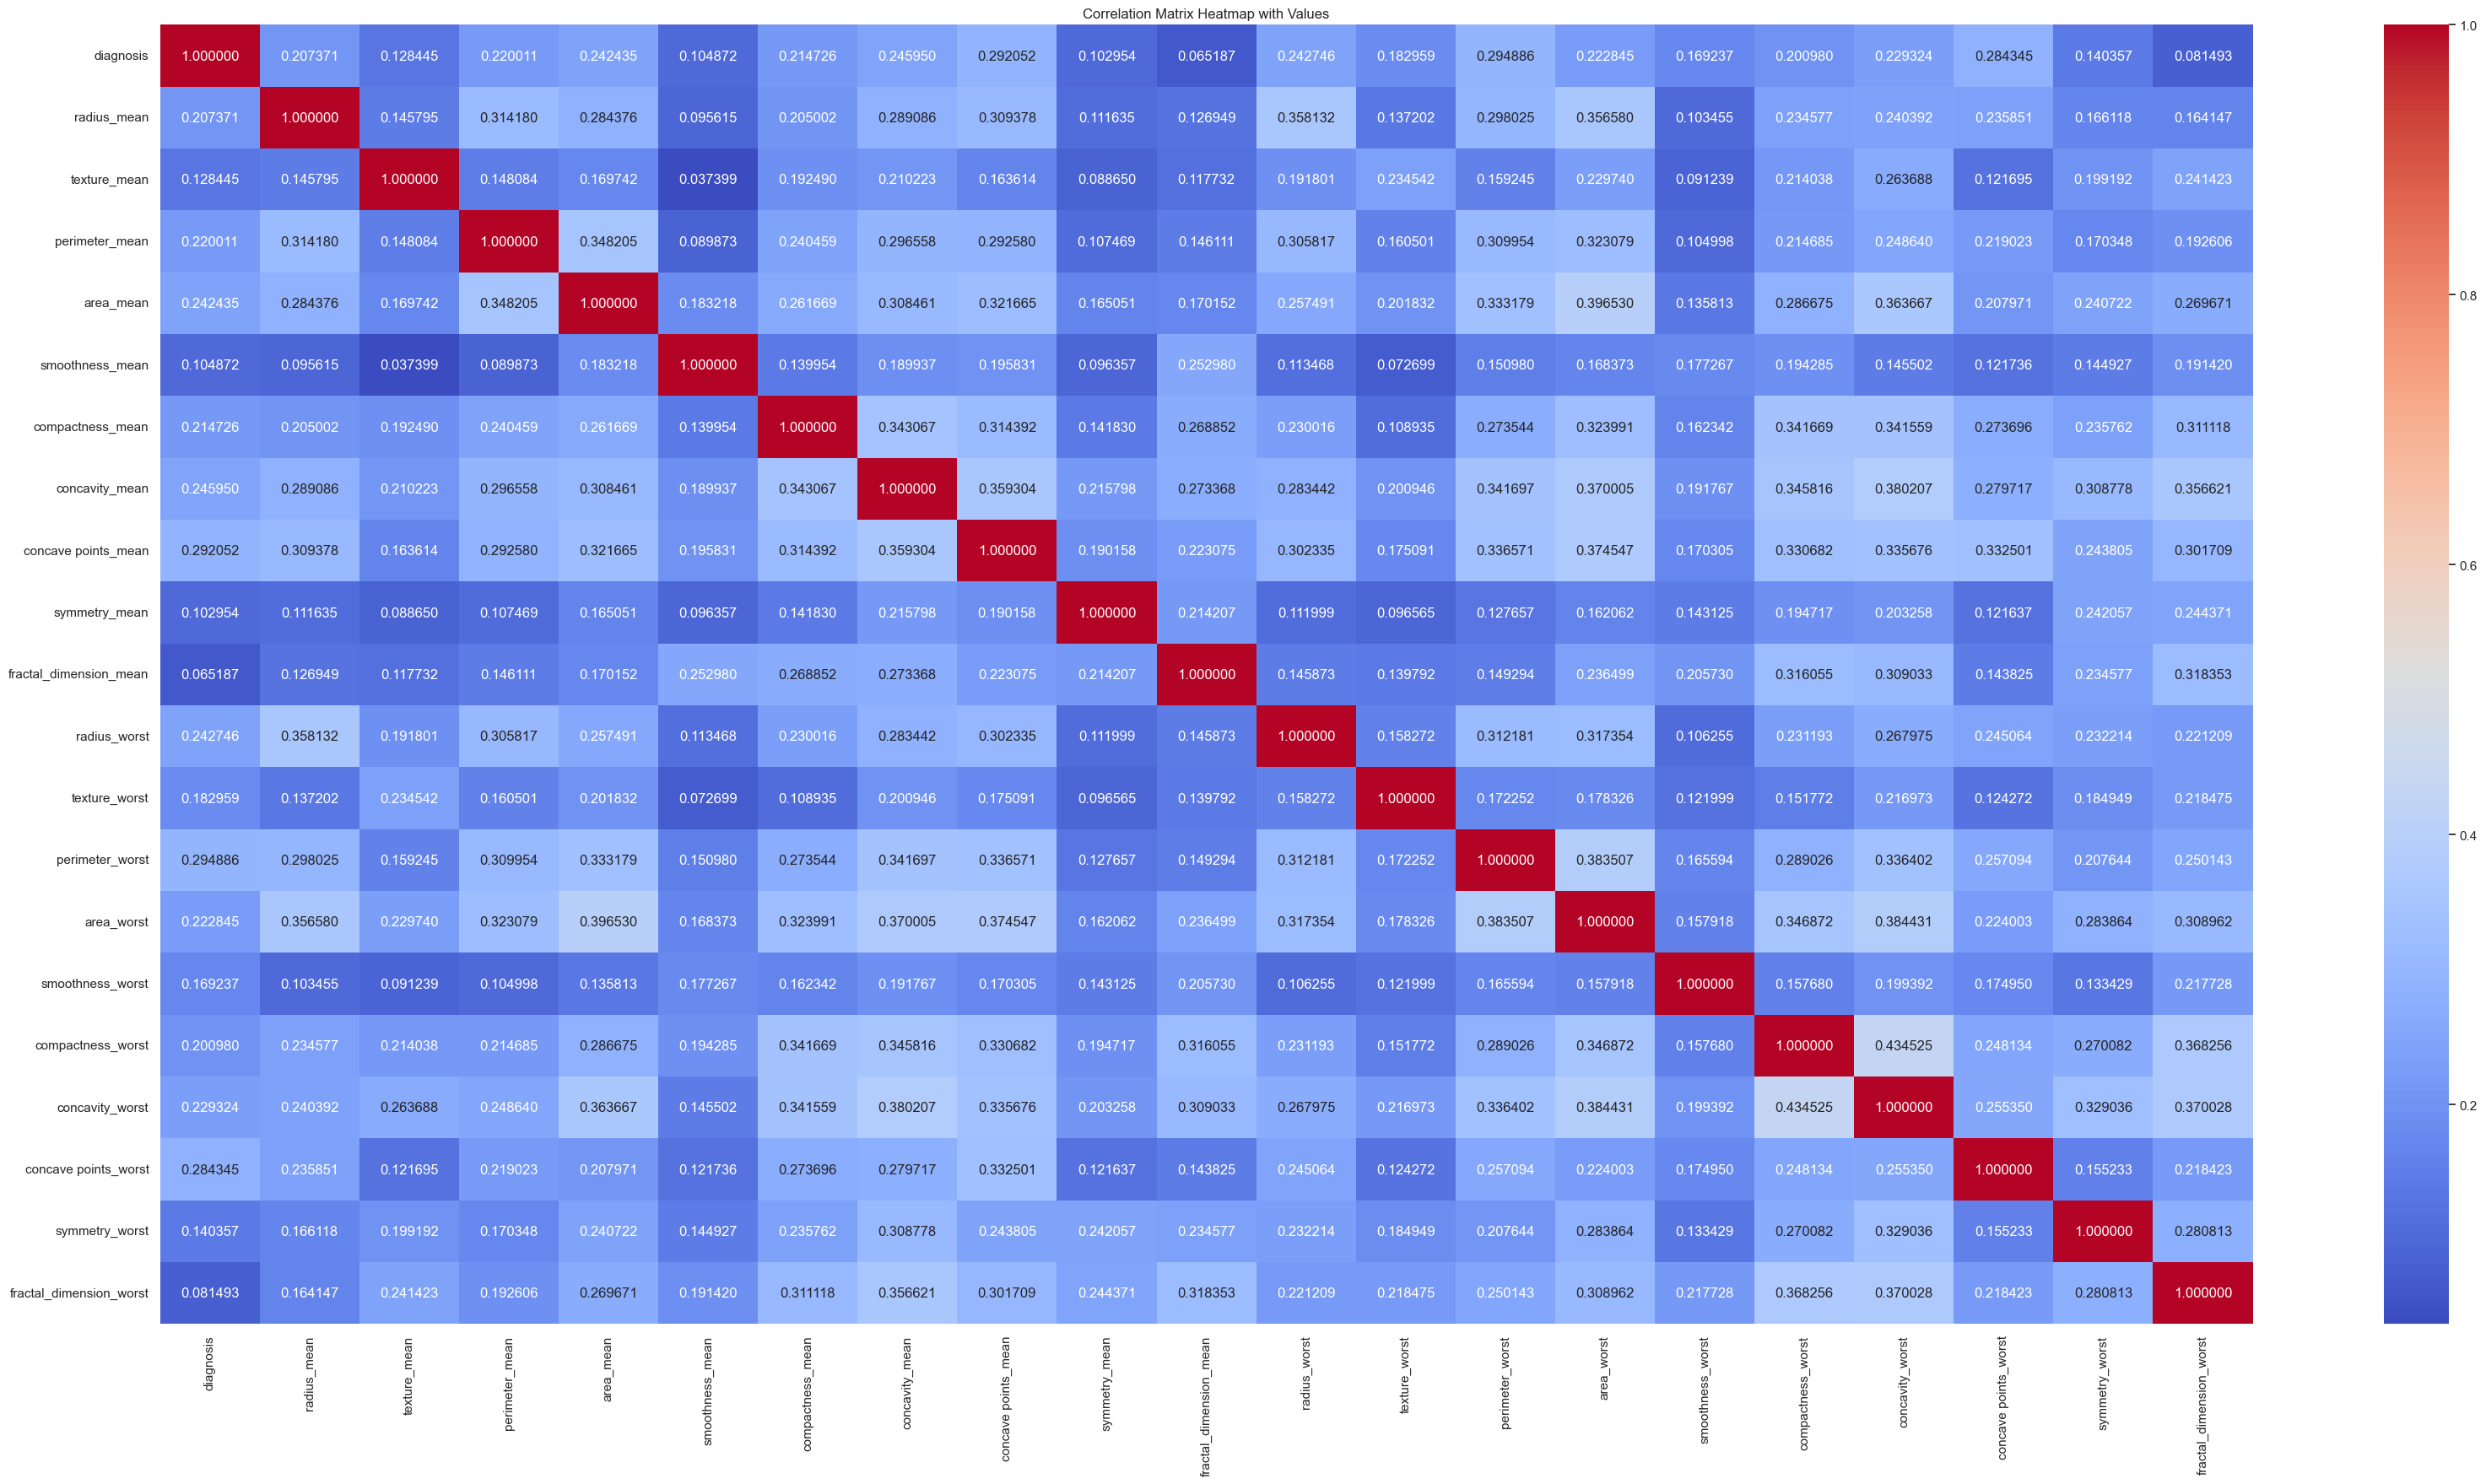

In [25]:
# Plotting heatmap with correlation values
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".6f", cmap='coolwarm') 
plt.title('Correlation Matrix Heatmap with Values')
plt.show()

### Parameter Relationships and Input Justification

#### 1. Perimeter, Radius, Area, and Compactness Relationship

- **Perimeter**: This is the boundary length of the cell nucleus and can be directly measured from the segmented image. It serves as the basis for calculating other related parameters.
- **Radius**: The radius can be derived from the perimeter using the formula:

  $$\text{Radius} = \frac{\text{Perimeter}}{2\pi}$$

- **Area**: The area of the cell nucleus can be computed using the derived radius:

  $$\text{Area} = \pi \times (\text{Radius})^2$$

- **Compactness**: This is a measure of how compact the cell nucleus is and can be calculated using the perimeter and area:

  $$\text{Compactness} = \frac{\text{Perimeter}^2}{\text{Area}} - 1$$

#### Conclusion for Choosing Inputs:
Given the interrelation among perimeter, radius, area, and compactness and high correlation between these parameters, we can simplify the input requirements by using **perimeter as the input**. The other parameters (radius, area, and compactness) can be derived from the perimeter, reducing the number of separate inputs needed.

#### 2. Other Independent Parameters

- **Texture**:
  - **Description**: Measures the variation in pixel intensity (intensity of light) across the cell nucleus image.
  - **Input Requirements**: We will take both the intensity and mean intensity as inputs for calculating texture.
  
- **Concavity and Concave Points**:
  - **Description**: These measure the inward curves of the cell boundary.
  - **Input Requirements**: These will be taken directly as inputs as they provide unique shape information not derivable from perimeter alone.
  
- **Symmetry**:
  - **Description**: Measures how symmetrical the cell nucleus is along different axes.
  - **Input Requirements**: We will take half-length measurements for both the left and right sides as inputs.

#### **Summary of Inputs**

- **Primary Input**:
  - **Perimeter** (used to derive radius, area, and compactness)

- **Additional Inputs**:
  - **Texture**: Intensity and mean intensity
  - **Concavity and Concave Points**: Direct input
  - **Symmetry**: Half-length measurements for both right and left sides

By focusing on these inputs, we maintain comprehensive coverage of the necessary parameters while optimizing the input set for simplicity and efficiency.


In [26]:
# Dropping the the four parameters with their worst values
dr_col = ['radius_mean', 'radius_worst', 'area_mean', 'area_worst', 'compactness_mean', 'compactness_worst']

data = data.drop(columns=dr_col)

In [27]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Extract the correlation of features with the 'diagnosis' column
corr_with_diagnosis = correlation_matrix['diagnosis'].sort_values(ascending=False)

corr_with_diagnosis

diagnosis                  1.000000
perimeter_worst            0.294886
concave points_mean        0.292052
concave points_worst       0.284345
concavity_mean             0.245950
concavity_worst            0.229324
perimeter_mean             0.220011
texture_worst              0.182959
smoothness_worst           0.169237
symmetry_worst             0.140357
texture_mean               0.128445
smoothness_mean            0.104872
symmetry_mean              0.102954
fractal_dimension_worst    0.081493
fractal_dimension_mean     0.065187
Name: diagnosis, dtype: float64

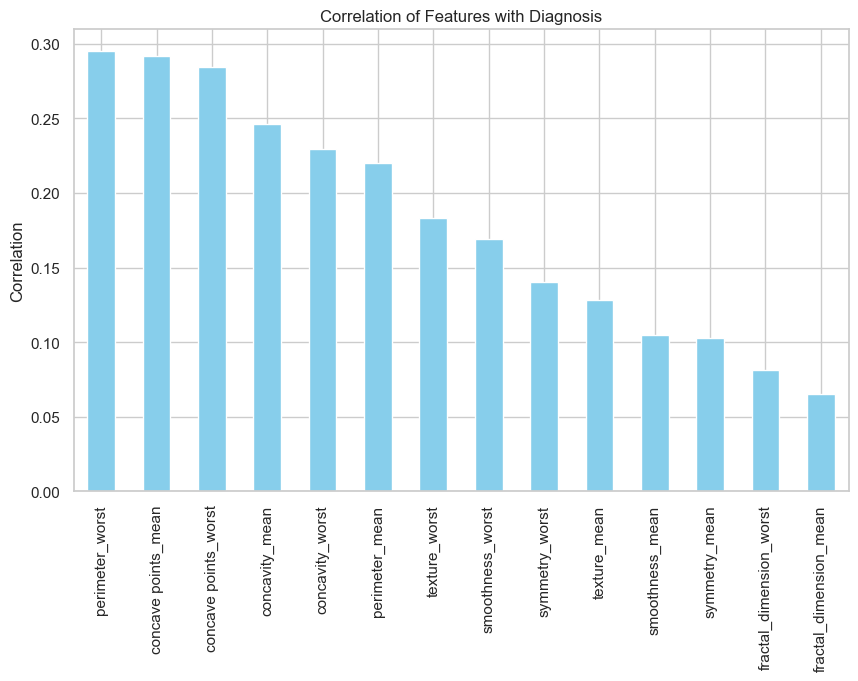

In [28]:
# Plotting the correlation of diagnosis with features
plt.figure(figsize=(10, 6))
corr_with_diagnosis.drop('diagnosis').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Diagnosis')
plt.ylabel('Correlation')
plt.show()

#### Dropping Fractal Dimension and Symmetry Columns

As seen from the correlation analysis below, the **fractal dimension** features (`fractal_dimension_mean` and `fractal_dimension_worst`) and **Symmetry** features (`symmetry_mean` and `symmetry_worst`) have **very low correlation** with the target variable, i.e., the diagnosis column. Since these features do not significantly contribute to the prediction of diagnosis, we have decided to drop them to streamline the model and reduce unnecessary complexity.

The chart below demonstrates the correlation of all features with the diagnosis, where the fractal dimension features show minimal impact:

<img src="Correlation.png" alt="Correlation Image" width="500" height="300">

The following columns are dropped:

- `fractal_dimension_mean`
- `fractal_dimension_worst`
- `symmetry_mean`
- `symmetry_worst`

By removing these low-impact features, we aim to improve the model’s efficiency while maintaining its predictive performance.


In [29]:
# Dropping Fractal Dimension parameter due to less significance
data.drop(columns=['fractal_dimension_mean', 'fractal_dimension_worst', 'symmetry_mean', 'symmetry_worst'], inplace = True)


## Preprocessing of data

## Data Preprocessing Pipelines for Machine Learning

To prepare the dataset for model training, we apply a comprehensive preprocessing pipeline that handles missing values, scales numerical features, and encodes categorical variables. This process ensures that the data is clean, consistent, and ready for use in our machine learning model.

### 1. **Numeric Feature Preprocessing**
Numeric features often require special handling to ensure that all values are comparable and no information is lost due to missing data. For the numeric columns, we employ the following techniques:

- **Imputation**: Any missing values in the numeric columns are replaced with the **mean** value of that column. This approach ensures that missing data points do not affect the model's performance.
- **Scaling**: All numeric data is standardized using **StandardScaler**, which scales the features so that they have a mean of 0 and a standard deviation of 1. This is particularly important for models sensitive to the scale of input data.


### 2. **Categorical Feature Preprocessing**
For categorical features, we apply the following transformations:

- **Imputation**: Missing values are filled with the most frequent category.
- **One-Hot Encoding**: Categorical variables are converted into a binary format (one-hot encoding), ensuring that the model can work with categorical data.

### 3. **Combining Numeric and Categorical Pipelines**
We use a ColumnTransformer to apply the numeric and categorical pipelines simultaneously to their respective feature sets. This ensures that both types of data are preprocessed efficiently and effectively before being passed to the model.

In [30]:
# Classification of data
x_class,y_class=make_classification(n_samples=100,random_state=42)

x_class=data.drop(columns="diagnosis",axis=1)
y_class=data["diagnosis"]

In [31]:
# Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x_class, y_class, test_size=0.1, random_state=42)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)
print("y_train shape : ", y_train.shape)

x_train shape :  (1178, 10)
x_test shape :  (131, 10)
y_train shape :  (1178,)


In [32]:
# Preprocessing of the data
categorical_features =x_train.select_dtypes("object").columns
numeric_features = x_train.select_dtypes("number").columns
print("Categorical Features:", categorical_features)
print("Numeric Features:", numeric_features)

Categorical Features: Index([], dtype='object')
Numeric Features: Index(['texture_mean', 'perimeter_mean', 'smoothness_mean', 'concavity_mean',
       'concave points_mean', 'texture_worst', 'perimeter_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


In [33]:
# Data Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


## Model Selection and Hyperparameter Tuning for Breast Cancer Classification

For the task of predicting breast cancer diagnosis based on features extracted from fine needle aspiration (FNA) biopsies, we are utilizing multiple machine learning algorithms to find the best-performing model. The choice of models is driven by their suitability for classification tasks and their ability to handle structured datasets like ours, where both linear and non-linear relationships exist. We are using **Grid Search** to fine-tune the hyperparameters for each model and optimize their performance.

### 1. **Decision Tree Classifier (DT)**
A **Decision Tree** is a simple yet powerful model that works by splitting the data into subsets based on feature values. The model builds a tree-like structure, where each node represents a decision based on a feature and each leaf node represents an outcome (the diagnosis). 

- **Why Decision Tree?:** Decision Trees are interpretable and easy to visualize, making them useful for understanding feature importance. They also work well with datasets that have a mix of numeric and categorical features, like ours.
- **Hyperparameters for Tuning**: We will tune the **max_depth** to control how deep the tree grows, preventing overfitting.

### 2. **Random Forest Classifier (RF)**
A Random Forest is an ensemble of Decision Trees that improves upon individual trees by combining their predictions. Each tree in the forest is trained on a random subset of the data and a random subset of the features, reducing the likelihood of overfitting.

- **Why Random Forest?:** Random Forests are robust to overfitting, especially for datasets with a large number of features like ours. They also provide feature importance scores, helping us understand which features contribute most to the diagnosis.
- **Hyperparameters for Tuning:** We will use Grid Search to optimize the number of trees (n_estimators) and the maximum depth (max_depth) of each tree.

### 3. **K-Nearest Neighbors (KNN)**
The K-Nearest Neighbors algorithm is a simple, non-parametric model that classifies data points based on the majority class of their nearest neighbors. It is particularly useful for smaller datasets and when the relationships between features and the target variable are non-linear.

- **Why KNN?:** KNN works well for problems where similar data points should have similar labels. Since our dataset has both clear patterns and some overlap in the feature space, KNN can be an effective model.
- **Hyperparameters for Tuning:** The key hyperparameter for KNN is the number of neighbors (k) that are considered when making a classification decision.

### 4. **Support Vector Machine (SVM)**
A Support Vector Machine (SVM) is a powerful classifier that tries to find the hyperplane that best separates the data into classes. It works well for both linear and non-linear data, especially when the classes are not perfectly separable. The SVM can also use kernels to map input features into higher-dimensional space, making it a versatile model.

- **Why SVM?:** SVMs are known for their high performance in binary classification tasks like ours, where we want to classify between benign and malignant diagnoses. They can efficiently handle high-dimensional data, which makes them suitable for our dataset with multiple features.
- **Hyperparameters for Tuning:** The C parameter controls the trade-off between correctly classifying training points and allowing misclassifications (regularization). We will also tune the kernel type (linear or radial basis function (RBF)) and the gamma parameter.

### **Hyperparameter Tuning with Grid Search**
To further improve the performance of each model, we are using Grid Search to identify the optimal set of hyperparameters. Grid Search systematically tries different combinations of hyperparameters and evaluates each combination using cross-validation.

For example, we are tuning:

- **Max depth in Decision Tree and Random Forest:** Controls the maximum depth of the tree to avoid overfitting.
- **C parameter in SVM:** Controls regularization strength, balancing between margin maximization and classification accuracy.
- **k in KNN:** Defines the number of nearest neighbors used to classify a data point.


In [34]:
# Define ML_Models
DT=DecisionTreeClassifier()

RF=RandomForestClassifier()

KNN =KNeighborsClassifier()

SVM = SVC()

In [35]:
# Set up the pipeline
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNN)
])

# Define the parameter grid for KNN
param_grid = {
    'knn__n_neighbors': range(1, 31)  # Test KNN with 1 to 20 neighbors
}

# Use GridSearchCV to find the best number of neighbors
grid_search_knn = GridSearchCV(pipeline_knn, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search_knn.fit(x_train, y_train)

# Get the best parameter and the corresponding model
best_n_neighbors = grid_search_knn.best_params_['knn__n_neighbors']
best_accuracy = grid_search_knn.best_score_

print(f"Best number of neighbors: {best_n_neighbors}")
print(f"Best accuracy from cross-validation: {best_accuracy * 100:.2f}%")


Best number of neighbors: 9
Best accuracy from cross-validation: 70.79%


In [36]:
# Set up the pipeline with preprocessing and decision tree
pipeline_decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decision_tree', DT)
])

# Define the parameter grid for Decision Tree
param_grid = {
    'decision_tree__max_depth': range(1, 31),  # Testing max_depth from 1 to 20
    'decision_tree__random_state': [10, 20, 30, 40, 45, 50, 60, 100]  # Testing multiple random_state values
}

# Use GridSearchCV to find the best max_depth and random_state
grid_search_dt = GridSearchCV(pipeline_decision_tree, param_grid, cv=6, scoring='accuracy')
grid_search_dt.fit(x_train, y_train)

# Get the best parameters and corresponding model
best_max_depth = grid_search_dt.best_params_['decision_tree__max_depth']
best_random_state = grid_search_dt.best_params_['decision_tree__random_state']
best_accuracy = grid_search_dt.best_score_

print(f"Best max_depth: {best_max_depth}")
print(f"Best random_state: {best_random_state}")
print(f"Best accuracy from cross-validation: {best_accuracy * 100:.2f}%")

Best max_depth: 8
Best random_state: 10
Best accuracy from cross-validation: 71.73%


In [37]:
# Set up the pipeline with preprocessing and random forest
pipeline_random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('random_forest', RF)
])

# Define the parameter grid for Random Forest
param_grid = {
    'random_forest__max_depth': [5, 10, 15, 20, 25],  # Trying a range of max_depth values
    'random_forest__n_estimators': [50, 100, 200],  # Testing various n_estimators values
    'random_forest__random_state': [10, 20, 30, 45, 50]  # Trying different random_state values
}

# Use GridSearchCV to find the best max_depth, n_estimators, and random_state
grid_search_rf = GridSearchCV(pipeline_random_forest, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

# Get the best parameters and corresponding model
best_max_depth = grid_search_rf.best_params_['random_forest__max_depth']
best_n_estimators = grid_search_rf.best_params_['random_forest__n_estimators']
best_random_state = grid_search_rf.best_params_['random_forest__random_state']
best_accuracy = grid_search_rf.best_score_

print(f"Best max_depth: {best_max_depth}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best random_state: {best_random_state}")
print(f"Best accuracy from cross-validation: {best_accuracy * 100:.2f}%")

Best max_depth: 10
Best n_estimators: 200
Best random_state: 30
Best accuracy from cross-validation: 71.39%


In [38]:
# Set up the pipeline
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined earlier
    ('svm', SVM)
])

# Define the parameter grid using range-like values
param_grid = {
    'svm__C': np.logspace(-3, 3, 10),  # Range of C values from 0.001 to 1000
    'svm__gamma': np.logspace(-4, 1, 10),  # Range of gamma values from 0.0001 to 10
    'svm__kernel': ['rbf']  # We focus on the RBF kernel for this case
}

# Use GridSearchCV to find the best C and gamma values
grid_search_svm = GridSearchCV(pipeline_svm, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search_svm.fit(x_train, y_train)

# Get the best parameters and corresponding model
best_C = grid_search_svm.best_params_['svm__C']
best_gamma = grid_search_svm.best_params_['svm__gamma']
best_accuracy = grid_search_svm.best_score_

# Print the best parameters and accuracy
print(f"Best C: {best_C}")
print(f"Best gamma: {best_gamma}")
print(f"Best accuracy from cross-validation: {best_accuracy * 100:.2f}%")

Best C: 215.44346900318823
Best gamma: 0.004641588833612782
Best accuracy from cross-validation: 70.63%


In [39]:
# Training on Models
pipeline_knn.fit(x_train, y_train)
pipeline_random_forest.fit(x_train, y_train)
pipeline_decision_tree.fit(x_train, y_train)
pipeline_svm.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['texture_mean', 'perimeter_mean', 'smoothness_mean', 'concavity_mean',
       'concave points_mean', 'texture_worst', 'perimeter_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                 

Model: KNeighborsClassifier(n_neighbors=9)
Model Accuracy: 68.70%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71        76
           1       0.61      0.73      0.66        55

    accuracy                           0.69       131
   macro avg       0.69      0.69      0.69       131
weighted avg       0.70      0.69      0.69       131

--------------------------------------------------


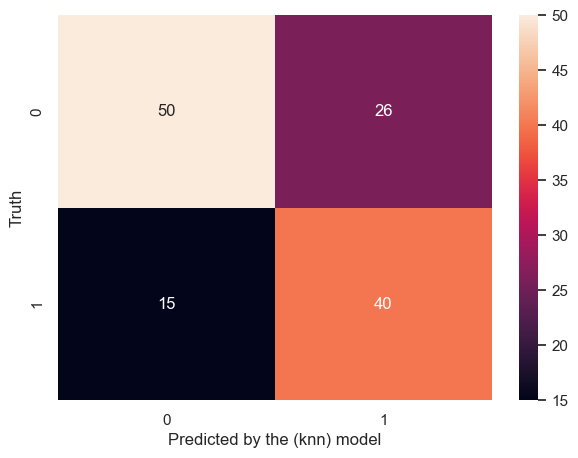

Model: DecisionTreeClassifier(max_depth=8, random_state=10)
Model Accuracy: 70.23%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74        76
           1       0.64      0.67      0.65        55

    accuracy                           0.70       131
   macro avg       0.70      0.70      0.70       131
weighted avg       0.70      0.70      0.70       131

--------------------------------------------------


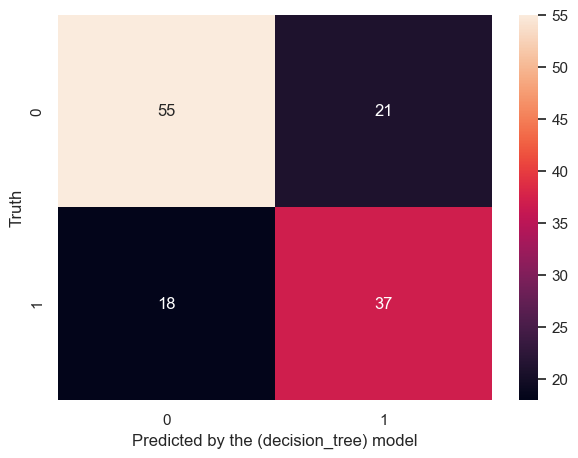

Model: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=30)
Model Accuracy: 70.99%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        76
           1       0.64      0.71      0.67        55

    accuracy                           0.71       131
   macro avg       0.71      0.71      0.71       131
weighted avg       0.72      0.71      0.71       131

--------------------------------------------------


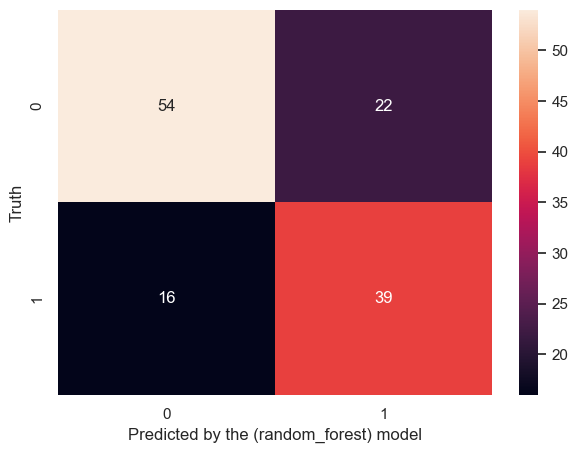

Model: SVC(C=215.44346900318823, gamma=0.004641588833612782)
Model Accuracy: 74.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        76
           1       0.66      0.78      0.72        55

    accuracy                           0.74       131
   macro avg       0.74      0.75      0.74       131
weighted avg       0.75      0.74      0.74       131

--------------------------------------------------


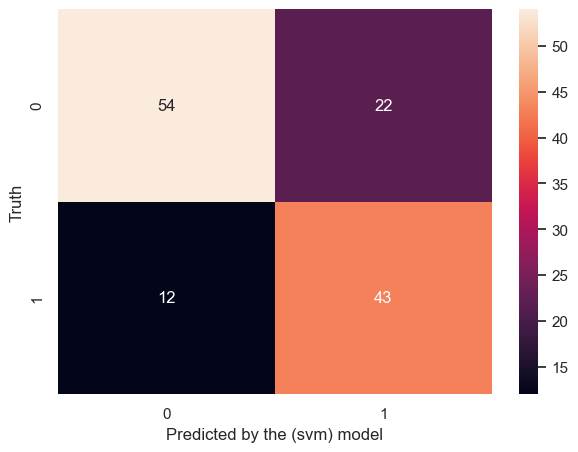

In [40]:
# Pipeline Evaluations
def evaluate_pipeline(pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)
    acc = pipeline.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred)
    
    print(f"Model: {pipeline.steps[-1][1]}")
    print(f"Model Accuracy: {acc * 100:.2f}%")
    print("\nClassification Report:")
    print(classif_report)
    print("-" * 50)
    
    # Plot the confusion matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True)
    plt.xlabel(f"Predicted by the ({pipeline.steps[-1][0]}) model")
    plt.ylabel('Truth')
    plt.show()

# Evaluate each pipeline

# Evaluate on the test set with the best number of neighbors
evaluate_pipeline(grid_search_knn.best_estimator_, x_test, y_test)

# Evaluate the best model on the test set
evaluate_pipeline(grid_search_dt.best_estimator_, x_test, y_test)

# Evaluate the best model on the test set
evaluate_pipeline(grid_search_rf.best_estimator_, x_test, y_test)

# Evaluate the best model on the test set
evaluate_pipeline(grid_search_svm.best_estimator_, x_test, y_test)

### Usage of Ensemble Model: Combining Random Forest and SVC

#### Overview
In this project, we implemented an ensemble learning model combining the strengths of **Random Forest Classifier** and **Support Vector Classifier (SVC)**. Individually, these models achieved the following accuracies on our dataset:

- **Random Forest Classifier**: 71.00%
- **Support Vector Classifier (SVC)**: 74.05%

To potentially improve performance and leverage the unique capabilities of each model, we combined them using a **Voting Classifier** ensemble approach.

#### Ensemble Strategy
The **Voting Classifier** uses a majority rule voting mechanism to combine the predictions of both models. This ensemble approach helps balance the variance and bias, leading to a potentially more robust model.

#### Ensemble Model Composition
- **Base Learners**:
  - **Random Forest Classifier**: Known for its ability to handle high variance by averaging multiple decision trees.
  - **Support Vector Classifier (SVC)**: Provides good performance on high-dimensional data and handles classification tasks efficiently.
- **Voting Type**: Hard voting, where the final prediction is based on the majority class predicted by the individual classifiers.

#### Implementation Steps
1. **Train each model individually** to observe their respective accuracies and behavior.
2. **Create a Voting Classifier** that includes both Random Forest and SVC as base learners.
3. **Evaluate the ensemble model** to compare its performance with the individual classifiers.


In [41]:
# Evaluation code for Ensemble Learning
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = model.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred)

    print(f"Model Accuracy: {acc * 100:.2f}%")
    print("\nClassification Report:")
    print(classif_report)
    print("-" * 50)

    # Plot the confusion matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

Model Accuracy: 74.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        76
           1       0.69      0.73      0.71        55

    accuracy                           0.75       131
   macro avg       0.74      0.75      0.74       131
weighted avg       0.75      0.75      0.75       131

--------------------------------------------------


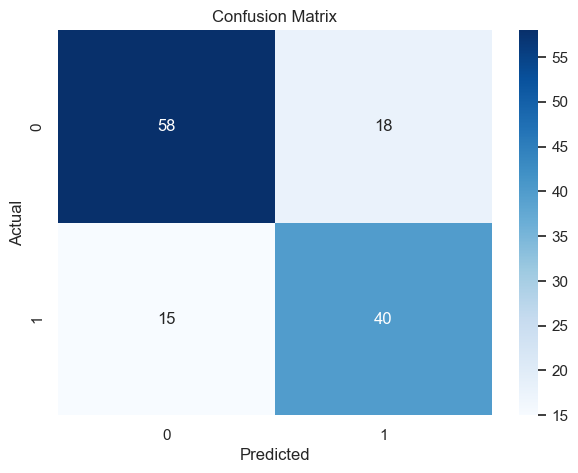

In [45]:
# Instantiate the models
rf_model = RandomForestClassifier(random_state=30, max_depth=10, n_estimators=200)
svc_model = SVC(probability=True, random_state=40, C=215.443469, gamma=0.0046415888)

# Create pipelines for each base model
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', rf_model)
])

pipeline_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc', svc_model)
])

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('rf', pipeline_random_forest), ('svc', pipeline_svc)],
    voting='soft'
)

# Fit the ensemble model on the training data
ensemble_model.fit(x_train, y_train)

# Evaluate the ensemble model
evaluate_model(ensemble_model, x_test, y_test)

In [48]:
# Save the model to a file using pickle
with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(ensemble_model, file)

print("Model saved successfully as 'ensemble_model.pkl'.")

Model saved successfully as 'ensemble_model.pkl'.


### Custom Artificial Neural Network (ANN) Model for Breast Cancer Prediction

We have developed a custom Artificial Neural Network (ANN) model to predict breast cancer diagnosis. The architecture is designed with performance and regularization in mind, aimed at preventing overfitting while still being complex enough to capture meaningful patterns in the data. The following is an explanation of the various components, such as **callbacks**, **layers**, **activation functions**, and **regularization techniques**, used in the model.

### 1. Callback for Early Stopping
We implemented a callback function to stop training once the model achieves an accuracy of 85% or higher. The idea behind this is to avoid unnecessary computation once we reach a satisfactory performance threshold. This also helps prevent overfitting, as training beyond this point might only enhance accuracy on the training set rather than improving the model’s ability to generalize.

**Why Callbacks?**  
Callbacks provide dynamic control over the training process. By monitoring accuracy and halting the process when a certain threshold is reached, we avoid overfitting and reduce computational resources.

### 2. Layer-wise Breakdown of the ANN

The architecture consists of multiple dense layers interleaved with **Batch Normalization** and **Dropout** layers. This structure helps in improving both the model’s generalization and training stability.

#### Input Layer & First Dense Layer
The input layer is followed by a dense layer with 48 neurons. The number of neurons is chosen to balance complexity and computational cost. **ReLU** activation is used here to introduce non-linearity, which is essential in capturing complex patterns from the input data. Additionally, an **L2 regularizer** is applied to prevent overfitting by penalizing large weight values.

#### Batch Normalization & Dropout Layers
**Batch Normalization** normalizes the activations of the previous layer, improving training speed and stability. It reduces the internal covariate shift, making the network less sensitive to weight initialization and allowing for higher learning rates. **Dropout**, on the other hand, randomly sets a fraction of the neurons to zero during each training iteration. This forces the model to learn more robust patterns rather than relying on any one neuron.

#### Second Dense Layer
This layer increases the number of neurons to 64, allowing the model to capture more complex patterns from the input data. The same **ReLU** activation is used, along with **L2 regularization** to help the model generalize better.

#### Third Dense Layer
With 128 neurons, this is the largest layer in the network. It gives the model more capacity to learn intricate relationships. The dropout rate is increased at this layer to prevent overfitting due to the larger number of neurons.

#### Fourth & Fifth Dense Layers
These layers progressively reduce the number of neurons (64 and 32, respectively). By gradually decreasing the network’s complexity, we encourage better generalization without sacrificing too much predictive power.

#### Output Layer
The output layer has just one neuron, using the **sigmoid activation function**. Since this is a binary classification problem (predicting benign or malignant tumors), the sigmoid function outputs a probability between 0 and 1, making it suitable for binary predictions.

#### 3. L2 Regularization
We have applied **L2 regularization** throughout the network, specifically on the dense layers. L2 regularization helps prevent overfitting by penalizing large weight values, encouraging the model to distribute its learning more evenly across all neurons.

**Why L2 Regularization?**  
Without regularization, the model might become too complex, fitting the noise in the training data rather than capturing the underlying patterns. L2 regularization adds a penalty proportional to the square of the weights, preventing any one weight from dominating the learning process.

#### 4. Why We Chose This Architecture
- **Multiple Hidden Layers:** The deep architecture with five hidden layers allows the model to capture intricate patterns in the data, such as the relationships between different features and the diagnosis.
- **Batch Normalization:** By normalizing the activations within each layer, batch normalization improves the training speed and stability, making it easier for the model to converge.
- **Dropout:** Dropout is crucial for preventing overfitting, particularly in deep networks with many parameters. By randomly deactivating a portion of the neurons during training, the network is forced to learn more generalized features.
- **Regularization:** The L2 regularizer ensures that the model doesn’t overfit by penalizing large weights, encouraging a more even learning process across the network.

This ANN architecture, coupled with callbacks, dropout layers, batch normalization, and regularization techniques, provides a robust framework for accurate breast cancer prediction. The model is designed to generalize well to unseen data, making it reliable for real-world applications.


In [91]:
# Define Callbacks
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\n Reached  85 % accuracy so cancelling training!")
      self.model.stop_training = True

In [92]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [93]:
# Define the model

model_r = Sequential([
    Dense(units=48, input_shape=(x_train.shape[1],), activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(units=64, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(units=128, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(units=64, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(units=32, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(units=1, activation="sigmoid")
])

model_r.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 48)                528       
                                                                 
 batch_normalization_18 (Bat  (None, 48)               192       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 48)                0         
                                                                 
 dense_23 (Dense)            (None, 64)                3136      
                                                                 
 batch_normalization_19 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 64)               

In [94]:
# Compile the model
model_r.compile(
    loss="binary_crossentropy",
    optimizer= Adam(learning_rate=0.001),
    metrics=["accuracy"],
)


callbacks =myCallback()

print("\n Model_Training:")

history = model_r.fit(x_train, y_train_encoded, epochs=500, batch_size=100, validation_split=0.3, callbacks=callbacks)
history


 Model_Training:
Epoch 1/500
9/9 [==============================] - 1s 20ms/step - loss: 1.1890 - accuracy: 0.5206 - val_loss: 0.9613 - val_accuracy: 0.5650
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 1.1288 - accuracy: 0.5716 - val_loss: 0.9477 - val_accuracy: 0.5508
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 1.0242 - accuracy: 0.6347 - val_loss: 0.9353 - val_accuracy: 0.5452
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 1.0176 - accuracy: 0.6396 - val_loss: 0.9227 - val_accuracy: 0.5621
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 0.9871 - accuracy: 0.6493 - val_loss: 0.9079 - val_accuracy: 0.6271
Epoch 6/500
9/9 [==============================] - 0s 7ms/step - loss: 0.9856 - accuracy: 0.6189 - val_loss: 0.8937 - val_accuracy: 0.6695
Epoch 7/500
9/9 [==============================] - 0s 6ms/step - loss: 0.9645 - accuracy: 0.6578 - val_loss: 0.8807 - val_accuracy: 0.6751
Epoch 8/

In [95]:
# Model Prediction Testing
y_prediction = model_r.predict(x_test)
y_prediction[:10]

5/5 [==============================] - 0s 765us/step


array([[0.9651435 ],
       [0.13062824],
       [0.01326029],
       [0.09612726],
       [0.9804167 ],
       [0.0024015 ],
       [0.9296237 ],
       [0.00237124],
       [0.01928308],
       [0.9925005 ]], dtype=float32)

In [96]:
# Model Evaluation
model_r.evaluate(x_test, y_test_encoded, verbose=2)

5/5 - 0s - loss: 0.6386 - accuracy: 0.7176 - 26ms/epoch - 5ms/step


[0.6385576128959656, 0.7175572514533997]

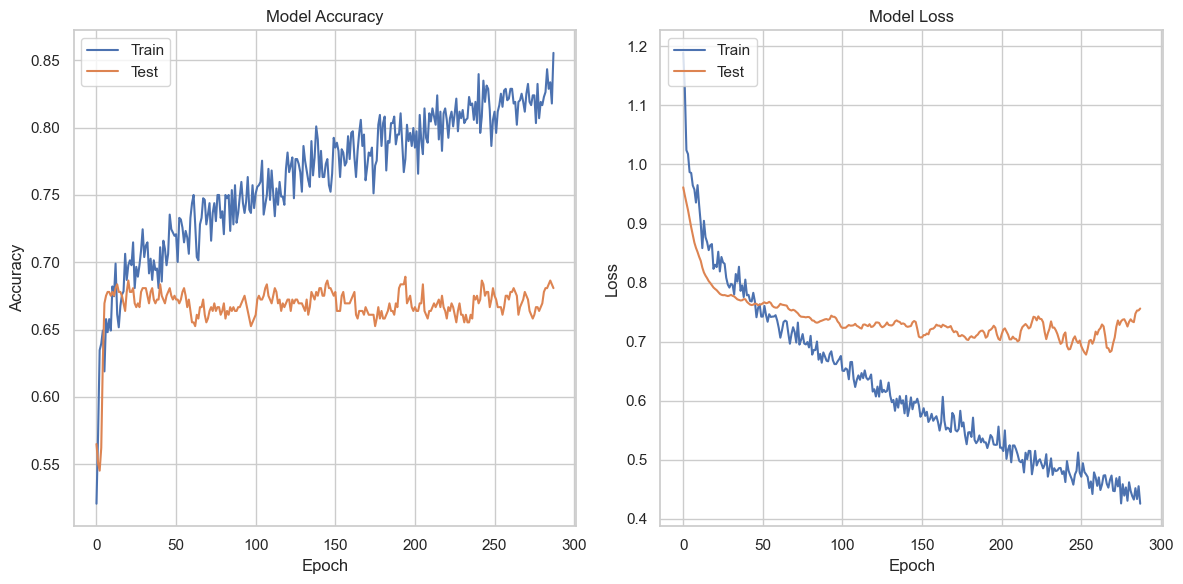

In [97]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [46]:
#Saving the Model
model_r.save('BCP.h5')
model_r.save('BCP.keras')